카드 업종별 모델 생성하기
-------------------------------------------------------------------------------
> 1. 업종별 데이터의 분포를 예측할 수 있다.
> 2. PCA를 통해 다중공선성이 높은 pm25와 pm10을 차원축소
> 3. 수치높은데이터(USE_CNT, USE_AMT, People, Count)는 log를 취함

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
# 업종별로 되어있는 데이터 자료 배열에 집어 넣기
path='유동인구데이터처리/통합데이터'
allFiles=glob.glob(path+'/*.csv')
list_all_data=[]
for file_ in allFiles:
    df=pd.read_csv(file_, encoding='utf-8')
    list_all_data.append(df)

In [3]:
list_all_data[0]

,STD_DD,GU_CD,AGE_CD_10,USE_CNT_10,USE_AMT_10,People_10,pm25,pm10,Count
0,2018-04-01,11110530,20,4.0,131.0,9591.89,31.958333,67.833333,5020
1,2018-04-01,11110530,25,21.5,2643.0,13780.19,31.958333,67.833333,5020
2,2018-04-01,11110530,30,46.0,5385.5,12530.04,31.958333,67.833333,5020
3,2018-04-01,11110530,35,37.5,5448.5,12691.61,31.958333,67.833333,5020
4,2018-04-01,11110530,40,31.0,8194.0,11350.86,31.958333,67.833333,5020
5,2018-04-01,11110530,45,13.0,1981.0,13510.51,31.958333,67.833333,5020
6,2018-04-01,11110530,50,4.0,598.0,11954.93,31.958333,67.833333,5020
7,2018-04-01,11110530,55,13.5,742.0,12120.18,31.958333,67.833333,5020
8,2018-04-01,11110530,60,8.5,873.0,11121.25,31.958333,67.833333,5020
9,2018-04-01,11110530,65,13.0,2895.0,6612.78,31.958333,67.833333,5020


In [4]:
# dtype 변경 후 인덱스화
for i in range(len(list_all_data)):
    list_all_data[i]['STD_DD']=pd.to_datetime(list_all_data[i]['STD_DD'], format='%Y-%m-%d')
    list_all_data[i].set_index(['STD_DD'], inplace=True)

In [5]:
list_all_data[0]

,GU_CD,AGE_CD_10,USE_CNT_10,USE_AMT_10,People_10,pm25,pm10,Count
STD_DD,,,,,,,,
2018-04-01,11110530,20,4.0,131.0,9591.89,31.958333,67.833333,5020
2018-04-01,11110530,25,21.5,2643.0,13780.19,31.958333,67.833333,5020
2018-04-01,11110530,30,46.0,5385.5,12530.04,31.958333,67.833333,5020
2018-04-01,11110530,35,37.5,5448.5,12691.61,31.958333,67.833333,5020
2018-04-01,11110530,40,31.0,8194.0,11350.86,31.958333,67.833333,5020
2018-04-01,11110530,45,13.0,1981.0,13510.51,31.958333,67.833333,5020
2018-04-01,11110530,50,4.0,598.0,11954.93,31.958333,67.833333,5020
2018-04-01,11110530,55,13.5,742.0,12120.18,31.958333,67.833333,5020
2018-04-01,11110530,60,8.5,873.0,11121.25,31.958333,67.833333,5020


In [6]:
#all_data_jong=all_data.query('serial<11350000')
#del all_data_jong['serial']
#all_data_no=all_data.query('serial>11350000')
#del all_data_no['serial']

In [7]:
# 타겟 데이터에 로그를 취함 (서로 간의 수치 차이가 큰 것을 방지)
list_card_name=[10,20,21,22,30,31,32,33,34,35,40,42,43,44,50,52,60,62,70,71,80,81,92]
for j in range(len(list_all_data)):
    list_all_data[j]['USE_CNT_'+str(list_card_name[j])]=np.log(list_all_data[j]['USE_CNT_'+str(list_card_name[j])])
    list_all_data[j]['USE_AMT_'+str(list_card_name[j])]=np.log(list_all_data[j]['USE_AMT_'+str(list_card_name[j])])
    list_all_data[j]['People_'+str(list_card_name[j])]=np.log(list_all_data[j]['People_'+str(list_card_name[j])])    
    list_all_data[j]['Count']=np.log(list_all_data[j]['Count'])

In [8]:
# 미세먼지 차원 축소
pm_pca=[]
for j in range(len(list_all_data)):
    pm_pca.append(pd.concat([list_all_data[j]['pm25'],list_all_data[j]['pm10']], axis=1))
    list_all_data[j].drop(['pm25','pm10'], axis=1, inplace=True)

In [9]:
from sklearn.decomposition import PCA

pm_pca_f=[]
for j in range(len(pm_pca)):
    pca = PCA(n_components=1)
    pm_pca_f.append(pca.fit_transform(pm_pca[j]))

In [10]:
for j in range(len(list_all_data)):
    list_all_data[j]['pm']=pm_pca_f[j]

In [11]:
list_all_data[0]

,GU_CD,AGE_CD_10,USE_CNT_10,USE_AMT_10,People_10,Count,pm
STD_DD,,,,,,,
2018-04-01,11110530,20,1.386294,4.875197,9.168673,8.521185,10.944835
2018-04-01,11110530,25,3.068053,7.879670,9.530987,8.521185,10.944835
2018-04-01,11110530,30,3.828641,8.591465,9.435884,8.521185,10.944835
2018-04-01,11110530,35,3.624341,8.603096,9.448696,8.521185,10.944835
2018-04-01,11110530,40,3.433987,9.011157,9.337049,8.521185,10.944835
2018-04-01,11110530,45,2.564949,7.591357,9.511223,8.521185,10.944835
2018-04-01,11110530,50,1.386294,6.393591,9.388899,8.521185,10.944835
2018-04-01,11110530,55,2.602690,6.609349,9.402627,8.521185,10.944835
2018-04-01,11110530,60,2.140066,6.771936,9.316613,8.521185,10.944835


In [12]:
# data split (train_test_split 사용)
from sklearn.model_selection import train_test_split

data_train=[]
data_test=[]
for i in range(len(list_all_data)):  # 변수 초기화
    data_train.append(0)
    data_test.append(0)
for i in range(len(list_all_data)):
    data_train[i], data_test[i] = train_test_split(list_all_data[i], test_size=0.3, random_state=154)

### 데이터 검증1
> 업종별 건수 예측 검증

In [101]:
# 백업 훈련, 테스트 데이터 만들기
Data_train=[]
Data_test=[]
Data_test_pic=[]
for i in range(len(list_all_data)):
    Data_train.append(data_train[i].copy())
    Data_test.append(data_test[i].copy())
    Data_test_pic.append(data_test[i].copy())

In [14]:
Data_train[0]

,GU_CD,AGE_CD_10,USE_CNT_10,USE_AMT_10,People_10,Count,pm
STD_DD,,,,,,,
2019-02-16,11110710,35,1.609438,5.826000,8.972418,8.058644,-19.830920
2018-08-03,11110600,35,2.140066,6.672666,8.072093,7.935230,11.459000
2018-07-27,11350695,60,1.871802,5.686975,9.929313,8.113427,14.637610
2018-10-25,11110530,55,2.140066,6.884487,9.842555,8.497399,-31.170769
2018-07-28,11110615,45,3.871201,8.541105,10.650482,7.273093,-13.086349
2019-01-20,11110710,20,1.386294,5.433722,8.630443,8.628019,46.670284
2018-12-01,11110600,65,1.609438,7.207860,7.019162,8.473868,2.046520
2019-03-14,11110630,35,2.890372,7.881182,9.909176,8.851950,27.387594
2018-05-08,11110630,45,2.833213,6.972606,9.993091,8.683893,-41.293152


In [15]:
Data_test[0]

,GU_CD,AGE_CD_10,USE_CNT_10,USE_AMT_10,People_10,Count,pm
STD_DD,,,,,,,
2019-01-31,11110530,30,2.890372,7.555905,9.904100,8.717518,26.412389
2018-08-02,11350695,65,1.386294,4.691348,9.307445,7.768956,7.943779
2019-01-12,11110615,60,2.397895,6.658011,10.762284,8.592857,65.771669
2018-05-27,11110530,55,2.397895,7.887959,9.474249,8.241176,22.070512
2018-06-16,11350695,45,3.091042,7.368970,10.146663,7.966587,-23.450846
2019-01-29,11110615,30,3.433987,7.653020,11.022476,8.954674,13.857918
2018-09-23,11110670,35,1.386294,5.860786,8.199110,6.848005,-24.728187
2018-11-22,11110615,40,3.332205,7.333350,10.781312,8.367068,-25.217090
2019-02-26,11110710,25,1.609438,4.919981,9.233068,8.456168,-19.170375


In [16]:
# 타겟 데이터 지우기
for i in range(len(list_all_data)):
    del Data_train[i]['USE_CNT_'+str(list_card_name[i])]
    del Data_test[i]['USE_CNT_'+str(list_card_name[i])]

In [17]:
# 타겟 데이터 설정하기
Data_train_labels=[]
Data_test_labels=[]
for i in range(len(list_all_data)):
    Data_train_labels.append(data_train[i]['USE_CNT_'+str(list_card_name[i])])
    Data_test_labels.append(data_test[i]['USE_CNT_'+str(list_card_name[i])])

In [18]:
# 모델 적용 전 피처 스케일링 이용 (RobustScaler 이용)
from sklearn.preprocessing import RobustScaler

for i in range(len(list_all_data)):
    rc = RobustScaler()
    Data_train[i] = rc.fit_transform(Data_train[i].astype('float'))
    Data_test[i] = rc.transform(Data_test[i].astype('float'))

In [19]:
# 검증 함수 만들기
from sklearn.metrics import mean_squared_error, r2_score

def evaluation(true_labels, predictions):
    mse = mean_squared_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)
    rmse = np.sqrt(mse)
    return mse, r2, rmse

#### Linear Regression 모델 사용


In [20]:
from sklearn.linear_model import LinearRegression

lin_reg_predictions=[]
lin_reg=[]
for i in list_all_data:  # 변수 초기화
    lin_reg_predictions.append(0)
    lin_reg.append(0)
    
for i in range(len(list_all_data)):
    lin_reg[i] = LinearRegression()
    lin_reg[i].fit(Data_train[i], Data_train_labels[i])
    lin_reg_predictions[i] = lin_reg[i].predict(Data_test[i])

In [21]:
#prediction with linear regression model
mse=[]
r2=[]
rmse=[]
for i in list_all_data:  # 변수 초기화
    mse.append(0)
    r2.append(0)
    rmse.append(0)
i=0
for j in list_card_name:
    mse[i], r2[i], rmse[i] = evaluation(Data_test_labels[i], lin_reg_predictions[i])
    print('\n-------------------------------'+str(j)+'번--------------------------------------\n')
    print('Test Set Check','MSE: ', mse[i],'\nR2 score: ', r2[i], '\nRMSE: ',rmse[i] )
    i+=1


-------------------------------10번--------------------------------------

Test Set Check MSE:  0.21930788526903608 
R2 score:  0.6799601614138856 
RMSE:  0.46830319801282166

-------------------------------20번--------------------------------------

Test Set Check MSE:  0.3500421384353687 
R2 score:  0.42812990460331213 
RMSE:  0.5916435907160397

-------------------------------21번--------------------------------------

Test Set Check MSE:  0.6144361772461852 
R2 score:  0.569895488398481 
RMSE:  0.7838597943804652

-------------------------------22번--------------------------------------

Test Set Check MSE:  0.40619153956039084 
R2 score:  0.6048821069480504 
RMSE:  0.6373315774072322

-------------------------------30번--------------------------------------

Test Set Check MSE:  0.10119107169076239 
R2 score:  0.012786770166492656 
RMSE:  0.318105441152399

-------------------------------31번--------------------------------------

Test Set Check MSE:  0.06290654401457903 
R2 score:  0.

In [22]:
#list_card_name=[10, 20, 21, 22, 30, 31, 32, 33, 34, 35, 40, 42, 43, 44, 50, 52, 60, 62, 70, 71, 80, 81, 92]
# 결과값이 제일 좋은것 그래프 도출 (40번 업종)
Data_test_pic[10]['predict']=lin_reg_predictions[10]
Data_test_pic[10].reset_index(inplace=True)
Data_test_pic[10]=Data_test_pic[10].sort_values(['STD_DD'])
Data_test_pic[10].set_index(['STD_DD'], inplace=True)

In [23]:
# 일별로 예측, 검증 값 표현하기
Data_test_pic[10]=Data_test_pic[10].resample('M', how={'USE_CNT_'+str(list_card_name[10]):np.mean, 'predict':np.mean}).dropna()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


In [24]:
Data_test_pic[10]

,USE_CNT_40,predict
STD_DD,,
2018-04-30,5.484007,5.495830
2018-05-31,5.477583,5.495276
2018-06-30,5.514956,5.496311
2018-07-31,5.472679,5.434511
2018-08-31,5.475350,5.425002
2018-09-30,5.462537,5.454478
2018-10-31,5.523168,5.527224
2018-11-30,5.482647,5.489629
2018-12-31,5.391069,5.391759


C:\Users\Owner\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


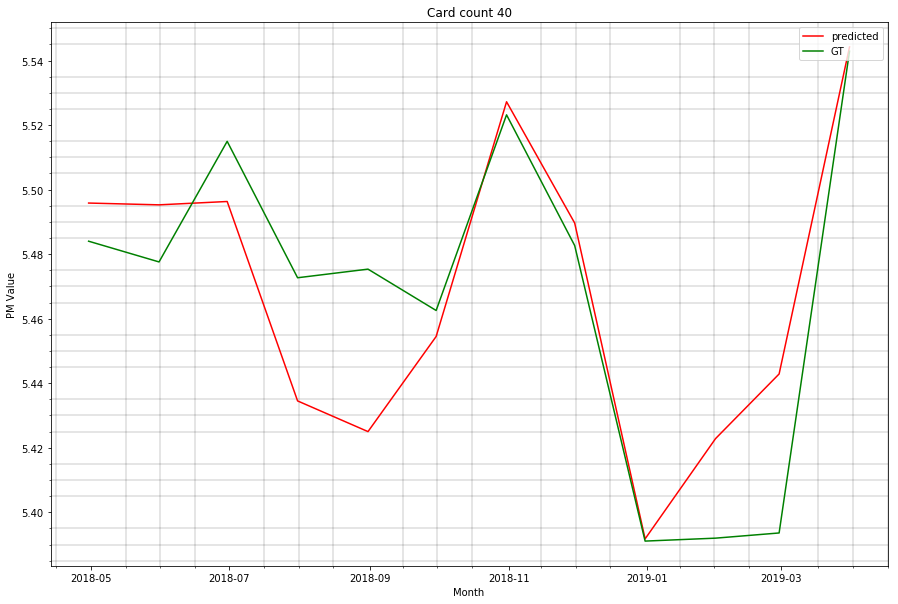

In [25]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

ax1.plot(Data_test_pic[10].index, Data_test_pic[10]['predict'], c='r', label='predicted')
ax1.plot(Data_test_pic[10].index, Data_test_pic[10]['USE_CNT_'+str(list_card_name[10])], c='g', label='GT')
plt.minorticks_on()
plt.title('Card count 40')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
plt.legend(loc='upper right')
plt.ylabel('PM Value')
plt.xlabel('Month')
#plt.show()
plt.savefig('지역,요일별유동인구/카드건수_LinearRegression_월 통합(40번).png', dpi=96*2, bbox_inches='tight', pad_inches=0.0)

#### ElasticNet Regression 모델 사용


In [26]:
from sklearn.linear_model import ElasticNet

ela_reg_predictions=[]
ela_reg=[]
for i in list_all_data:  # 변수 초기화
    ela_reg_predictions.append(0)
    ela_reg.append(0)
    
for i in range(len(list_all_data)):
    ela_reg[i] = ElasticNet(alpha=0.05, l1_ratio=0.2)
    ela_reg[i].fit(Data_train[i], Data_train_labels[i])
    ela_reg_predictions[i] = ela_reg[i].predict(Data_test[i])

In [27]:
#prediction with ElasticNet Regression model
mse=[]
r2=[]
rmse=[]
for i in list_all_data:  # 변수 초기화
    mse.append(0)
    r2.append(0)
    rmse.append(0)
i=0
for j in list_card_name:
    mse[i], r2[i], rmse[i] = evaluation(Data_test_labels[i], ela_reg_predictions[i])
    print('\n-------------------------------'+str(j)+'번--------------------------------------\n')
    print('Test Set Check','MSE: ', mse[i],'\nR2 score: ', r2[i], '\nRMSE: ',rmse[i] )
    i+=1


-------------------------------10번--------------------------------------

Test Set Check MSE:  0.22156024407048389 
R2 score:  0.6766732547603966 
RMSE:  0.4707018632536777

-------------------------------20번--------------------------------------

Test Set Check MSE:  0.3565448578491715 
R2 score:  0.4175062957197322 
RMSE:  0.5971137729521665

-------------------------------21번--------------------------------------

Test Set Check MSE:  0.624106546202014 
R2 score:  0.5631262429165589 
RMSE:  0.7900041431549673

-------------------------------22번--------------------------------------

Test Set Check MSE:  0.4122363568624925 
R2 score:  0.5990020842403513 
RMSE:  0.642056350223633

-------------------------------30번--------------------------------------

Test Set Check MSE:  0.10137275309117356 
R2 score:  0.011014298750746554 
RMSE:  0.31839088097992624

-------------------------------31번--------------------------------------

Test Set Check MSE:  0.06414464981934576 
R2 score:  0.05

#### Random Forest regressor 모델 사용


In [28]:
from sklearn.ensemble import RandomForestRegressor

random_forest_predictions=[]
random_forest_reg=[]
for i in list_all_data:  # 변수 초기화
    random_forest_predictions.append(0)
    random_forest_reg.append(0)
    
for i in range(len(list_all_data)):
    random_forest_reg[i] = RandomForestRegressor(n_estimators=100, random_state=100, oob_score=True)
    random_forest_reg[i].fit(Data_train[i], Data_train_labels[i])
    random_forest_predictions[i] = random_forest_reg[i].predict(Data_test[i])

In [29]:
#prediction with Random Forest regressor model
mse=[]
r2=[]
rmse=[]
for i in list_all_data:  # 변수 초기화
    mse.append(0)
    r2.append(0)
    rmse.append(0)
i=0
for j in list_card_name:
    mse[i], r2[i], rmse[i] = evaluation(Data_test_labels[i], random_forest_predictions[i])
    print('\n-------------------------------'+str(j)+'번--------------------------------------\n')
    print('Test Set Check','MSE: ', mse[i],'\nR2 score: ', r2[i], '\nRMSE: ',rmse[i] )
    i+=1


-------------------------------10번--------------------------------------

Test Set Check MSE:  0.10056612125030562 
R2 score:  0.8532420976441579 
RMSE:  0.3171216190206931

-------------------------------20번--------------------------------------

Test Set Check MSE:  0.1790942300946611 
R2 score:  0.7074105566060566 
RMSE:  0.4231952623726559

-------------------------------21번--------------------------------------

Test Set Check MSE:  0.16922699391682647 
R2 score:  0.881541328027586 
RMSE:  0.4113720869442

-------------------------------22번--------------------------------------

Test Set Check MSE:  0.13296093239661522 
R2 score:  0.8706638658116054 
RMSE:  0.36463808412810533

-------------------------------30번--------------------------------------

Test Set Check MSE:  0.07951933418829707 
R2 score:  0.22421477086297925 
RMSE:  0.2819917271628674

-------------------------------31번--------------------------------------

Test Set Check MSE:  0.059022440651104124 
R2 score:  0.13

In [102]:
#list_card_name=[10, 20, 21, 22, 30, 31, 32, 33, 34, 35, 40, 42, 43, 44, 50, 52, 60, 62, 70, 71, 80, 81, 92]
# 결과값 그래프 도출
for i in range(len(list_card_name)):
    Data_test_pic[i]['predict']=random_forest_predictions[i]
    Data_test_pic[i].reset_index(inplace=True)
    Data_test_pic[i]=Data_test_pic[i].sort_values(['STD_DD'])
    Data_test_pic[i].set_index(['STD_DD'], inplace=True)

In [103]:
# 일별로 예측, 검증 값 표현하기
for i in range(len(list_card_name)):
    Data_test_pic[i]=Data_test_pic[i].resample('M', how={'USE_CNT_'+str(list_card_name[i]):np.sum, 'predict':np.sum}).dropna()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
Data_test_pic[0]

,USE_CNT_10,predict
STD_DD,,
2018-04-30,1457.859211,1453.569636
2018-05-31,1574.455033,1579.722998
2018-06-30,1543.917983,1553.050015
2018-07-31,1573.789900,1572.222427
2018-08-31,1648.877193,1643.781218
2018-09-30,1391.396078,1415.663303
2018-10-31,1548.237700,1567.558455
2018-11-30,1524.288408,1546.816892
2018-12-31,1622.419977,1591.789933


C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


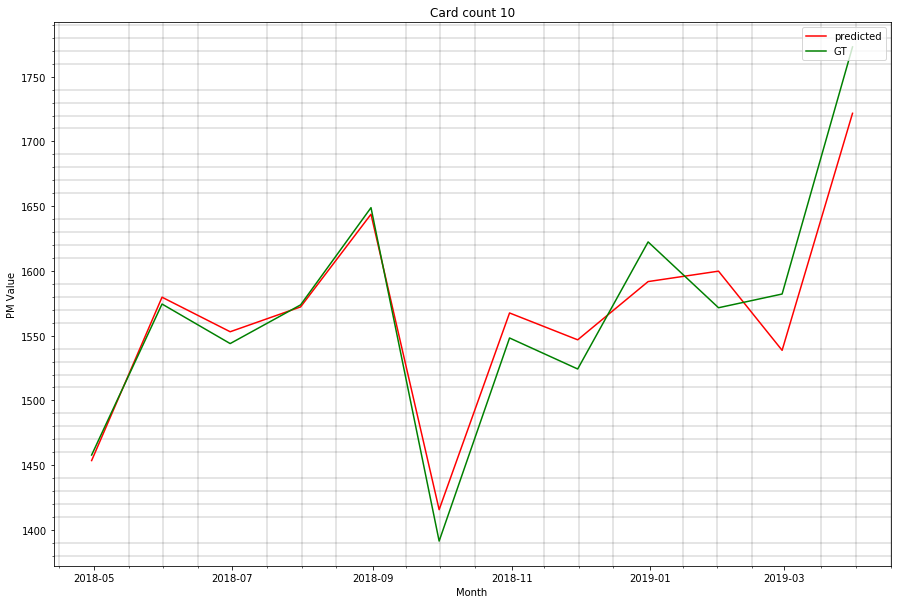

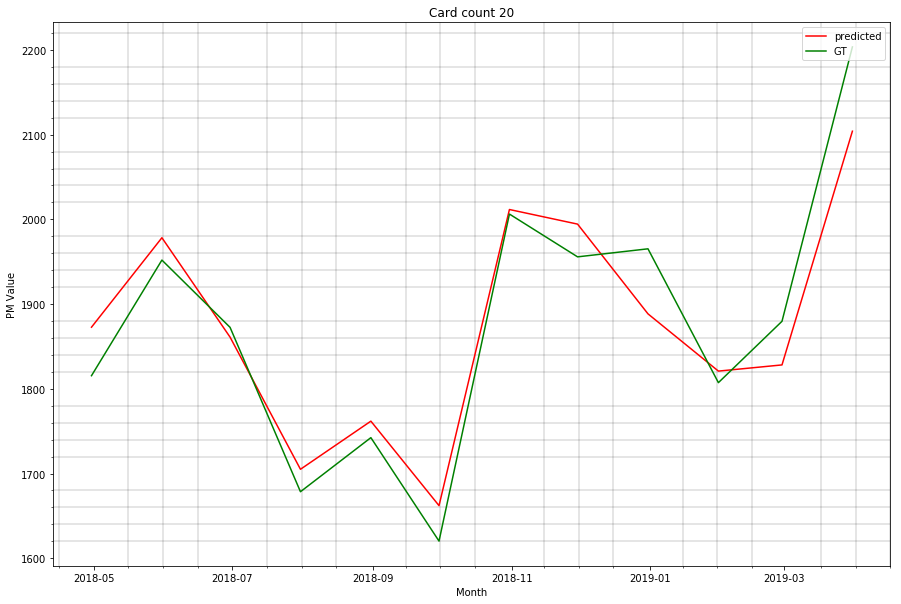

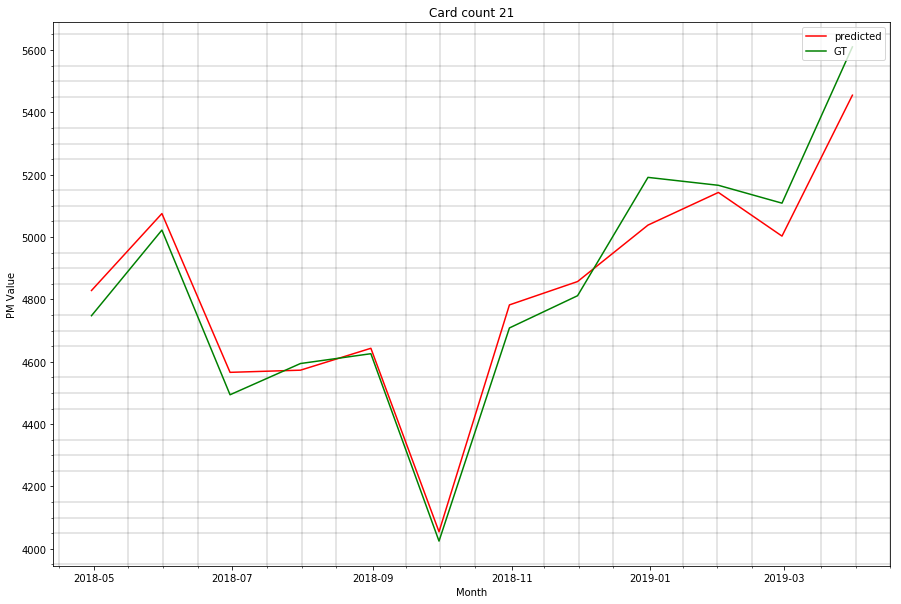

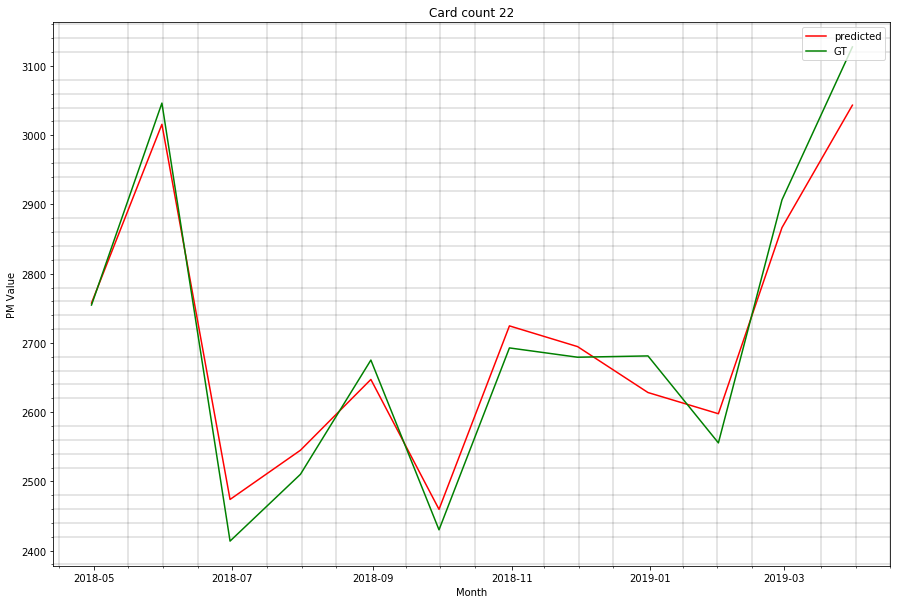

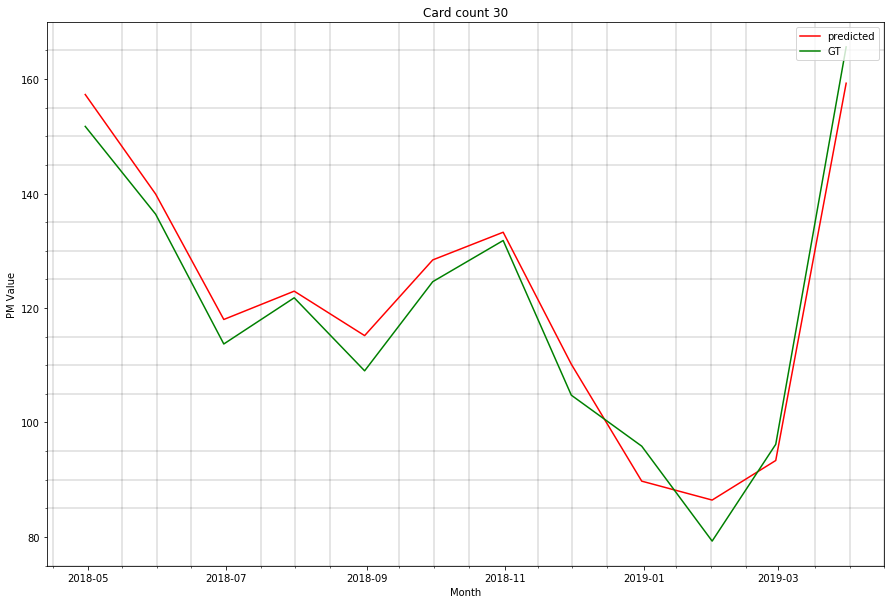

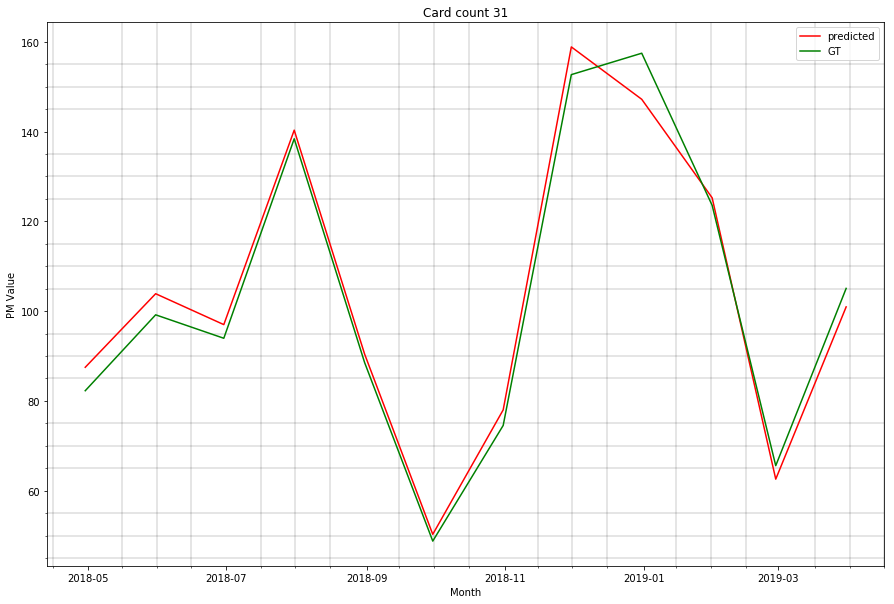

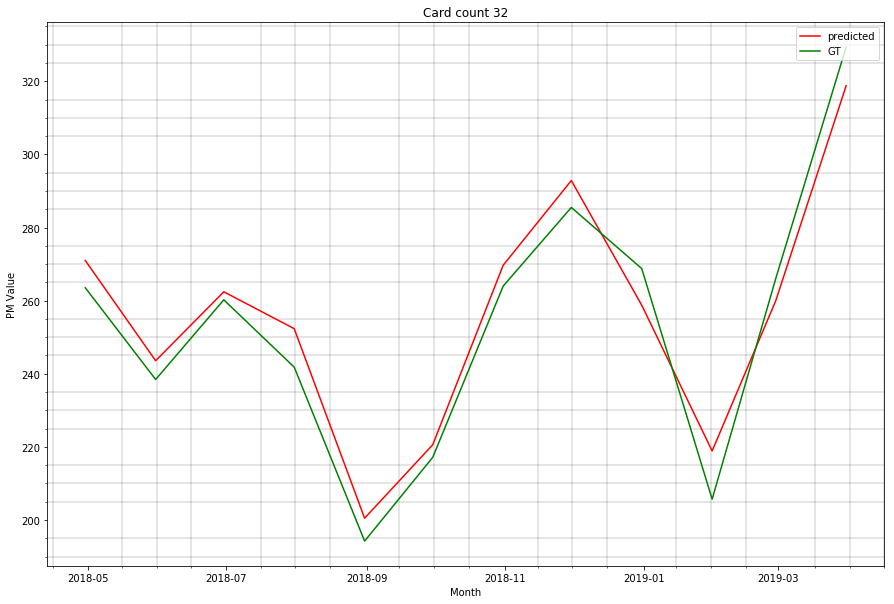

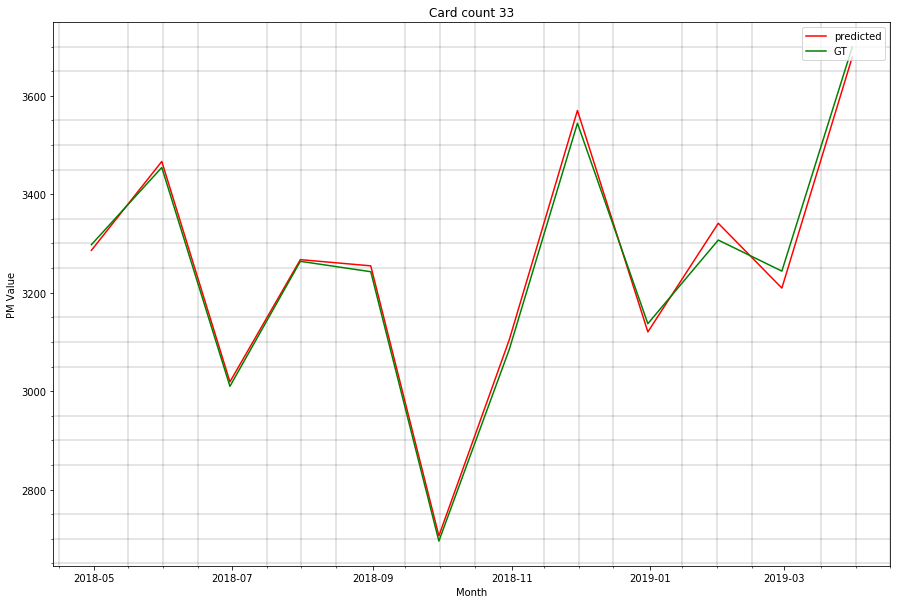

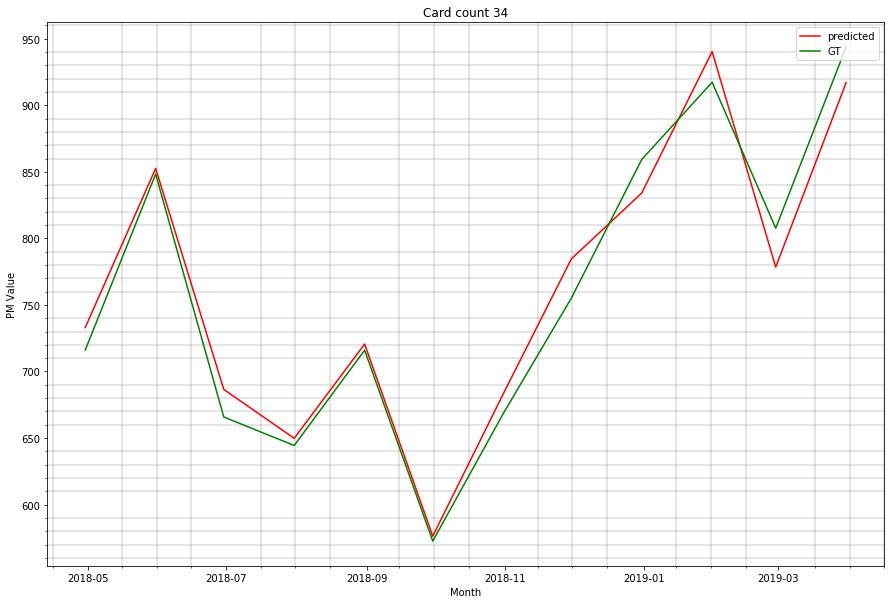

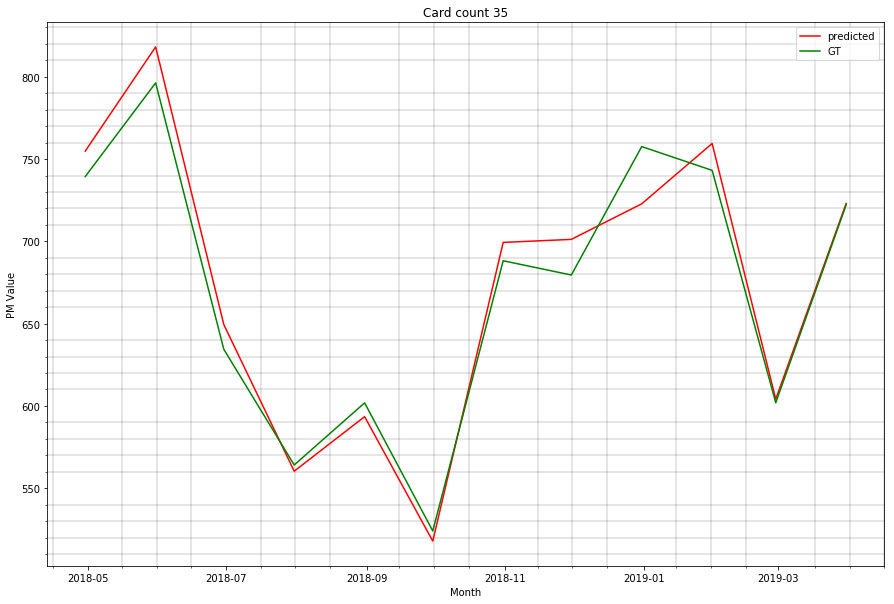

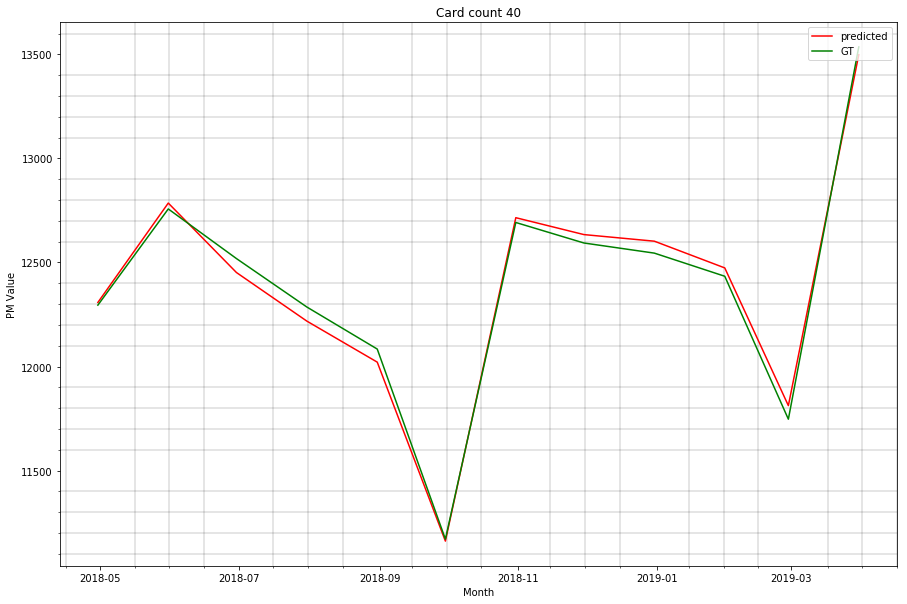

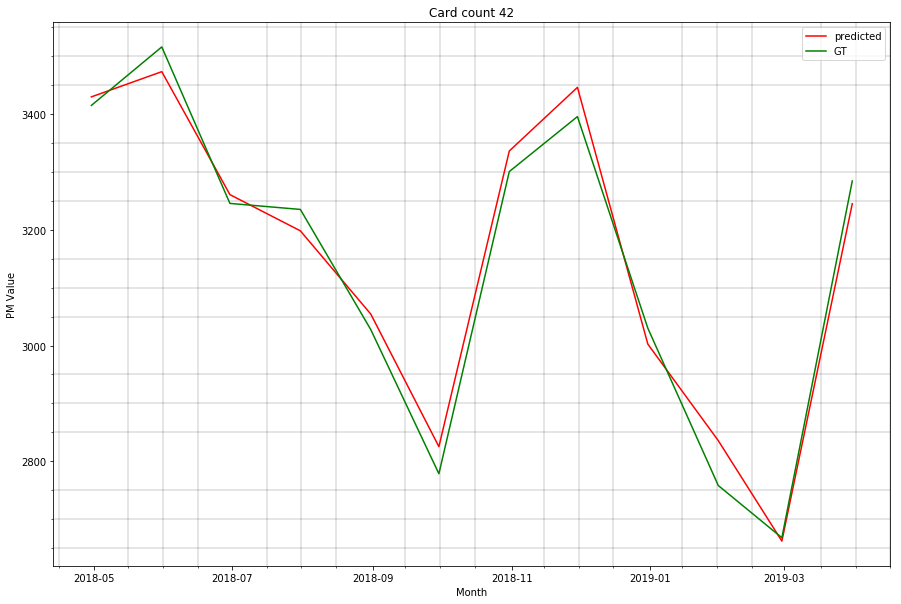

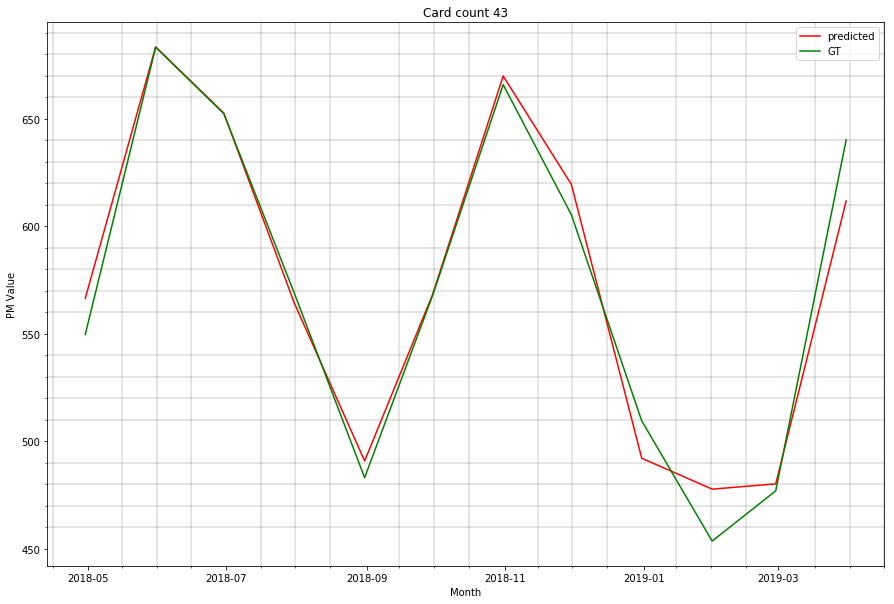

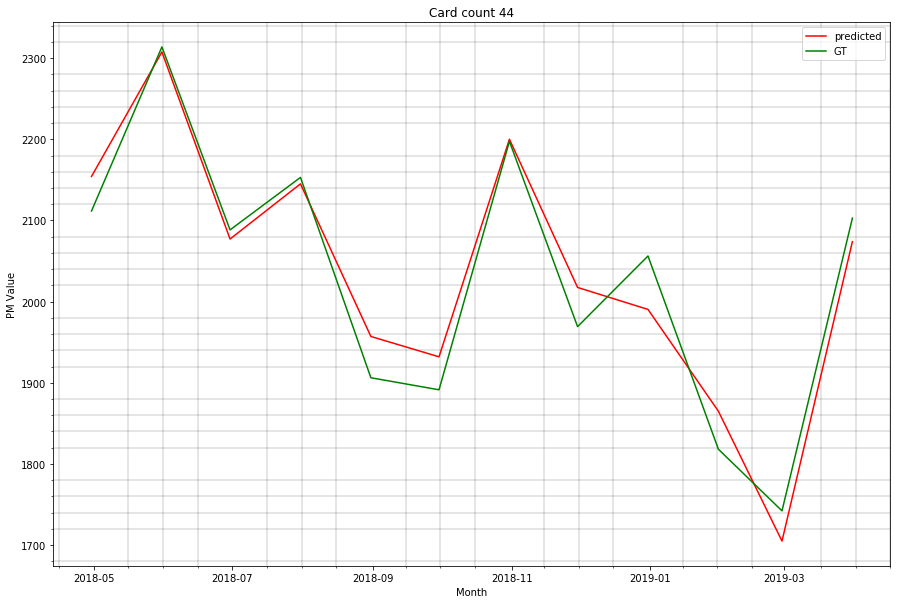

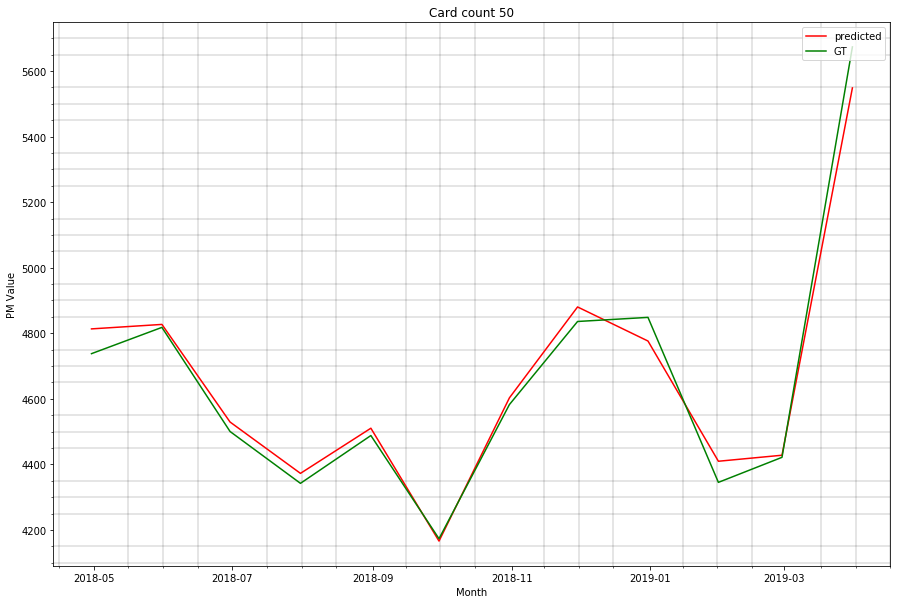

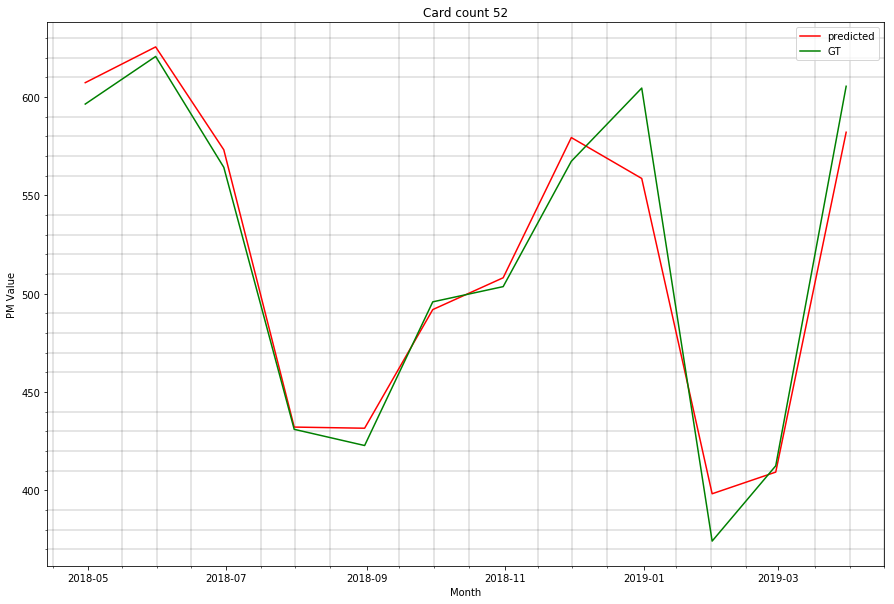

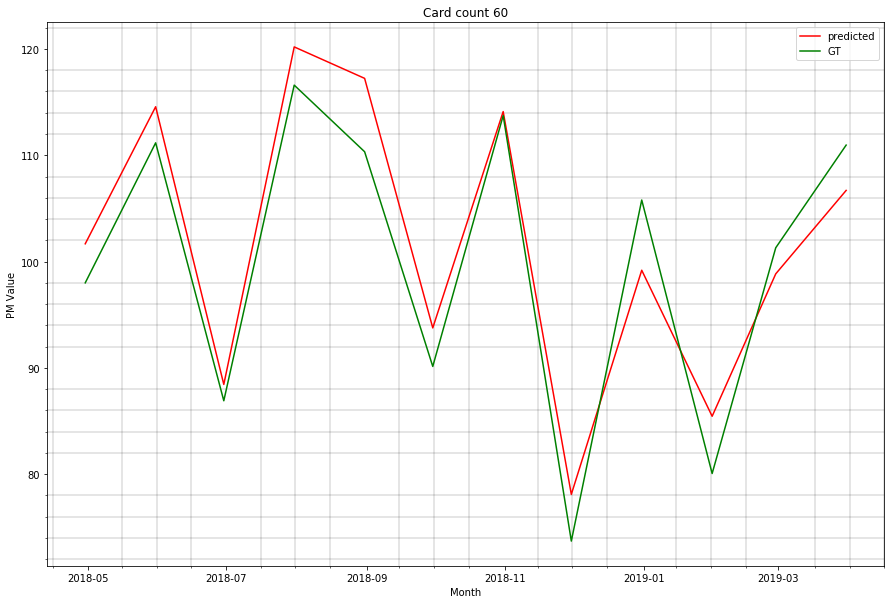

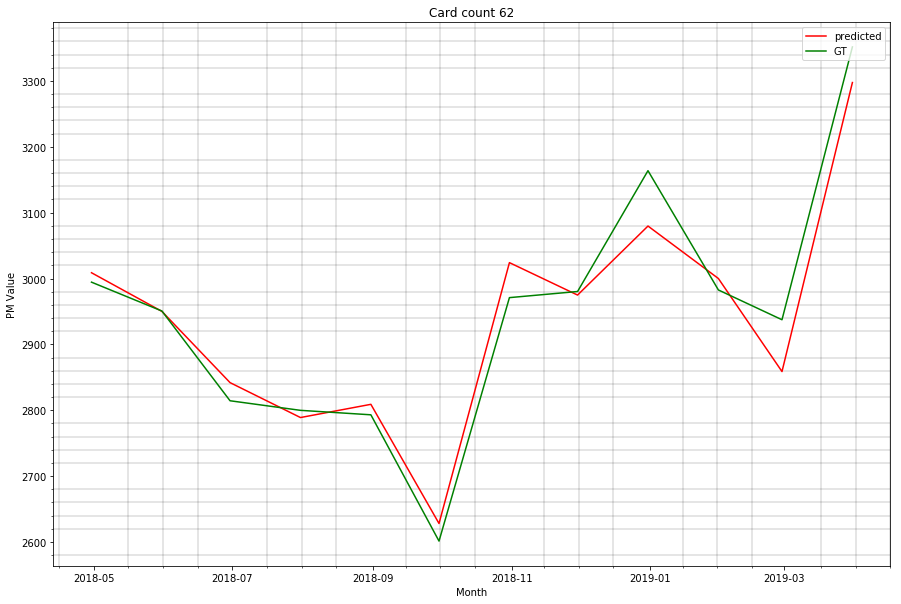

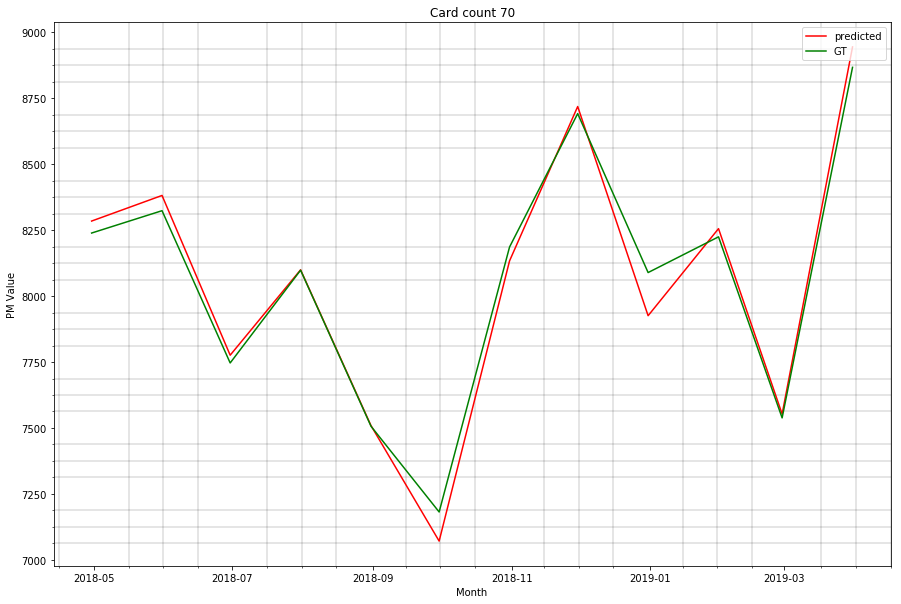

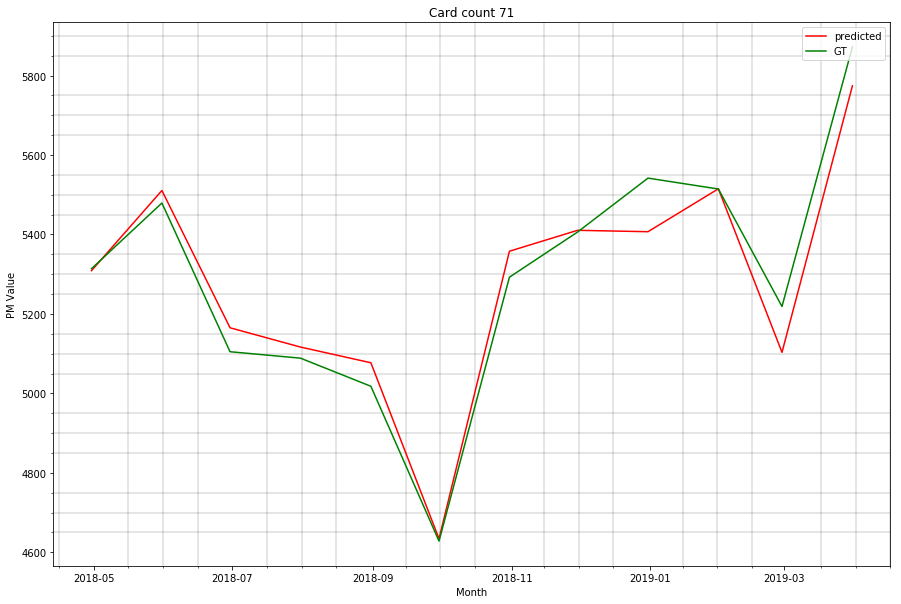

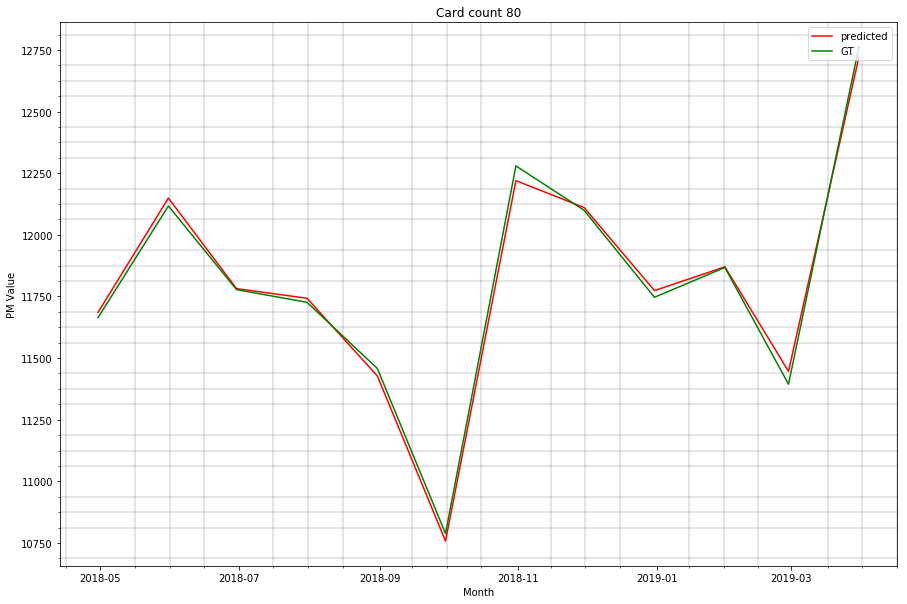

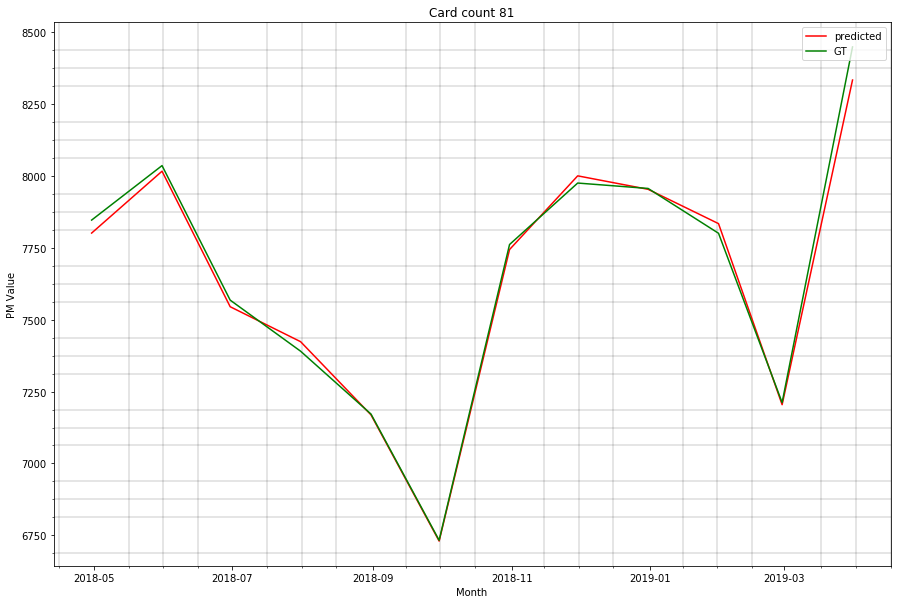

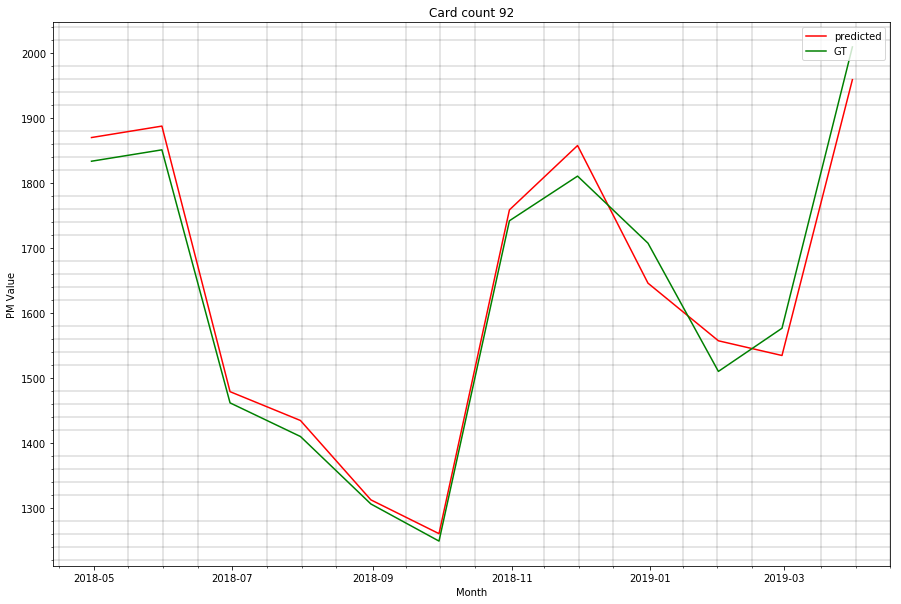

In [105]:
for i in range(len(list_card_name)):
    fig = plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(111)
    
    ax1.plot(Data_test_pic[i].index, Data_test_pic[i]['predict'], c='r', label='predicted')
    ax1.plot(Data_test_pic[i].index, Data_test_pic[i]['USE_CNT_'+str(list_card_name[i])], c='g', label='GT')
    plt.minorticks_on()
    plt.title('Card count '+str(list_card_name[i]))
    plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
    plt.legend(loc='upper right')
    plt.ylabel('PM Value')
    plt.xlabel('Month')
    
    plt.savefig('지역,요일별유동인구/카드건수_Randomforest_월별 통합('+str(list_card_name[i])+'번).png', dpi=96*2, bbox_inches='tight', pad_inches=0.0)

### 데이터 검증2
> 업종별 매출량 예측 검증

In [95]:
# 백업 훈련, 테스트 데이터 만들기
Data_train2=[]
Data_test2=[]
Data_test_pic2=[]
for i in range(len(list_all_data)):
    Data_train2.append(data_train[i].copy())
    Data_test2.append(data_test[i].copy())
    Data_test_pic2.append(data_test[i].copy())

In [51]:
# 타겟 데이터 지우기
for i in range(len(list_all_data)):
    del Data_train2[i]['USE_AMT_'+str(list_card_name[i])]
    del Data_test2[i]['USE_AMT_'+str(list_card_name[i])]

In [52]:
# 타겟 데이터 설정하기
Data_train_labels2=[]
Data_test_labels2=[]
for i in range(len(list_all_data)):
    Data_train_labels2.append(data_train[i]['USE_AMT_'+str(list_card_name[i])])
    Data_test_labels2.append(data_test[i]['USE_AMT_'+str(list_card_name[i])])

In [53]:
# 모델 적용 전 피처 스케일링 이용 (RobustScaler 이용)

for i in range(len(list_all_data)):
    rc = RobustScaler()
    Data_train2[i] = rc.fit_transform(Data_train2[i].astype('float'))
    Data_test2[i] = rc.transform(Data_test2[i].astype('float'))

#### Linear Regression 모델 사용


In [54]:
from sklearn.linear_model import LinearRegression

lin_reg_predictions2=[]
lin_reg2=[]
for i in list_all_data:  # 변수 초기화
    lin_reg_predictions2.append(0)
    lin_reg2.append(0)
    
for i in range(len(list_all_data)):
    lin_reg2[i] = LinearRegression()
    lin_reg2[i].fit(Data_train2[i], Data_train_labels2[i])
    lin_reg_predictions2[i] = lin_reg2[i].predict(Data_test2[i])

In [55]:
#prediction with linear regression model
mse=[]
r2=[]
rmse=[]
for i in list_all_data:  # 변수 초기화
    mse.append(0)
    r2.append(0)
    rmse.append(0)
i=0
for j in list_card_name:
    mse[i], r2[i], rmse[i] = evaluation(Data_test_labels2[i], lin_reg_predictions2[i])
    print('\n-------------------------------'+str(j)+'번--------------------------------------\n')
    print('Test Set Check','MSE: ', mse[i],'\nR2 score: ', r2[i], '\nRMSE: ',rmse[i] )
    i+=1


-------------------------------10번--------------------------------------

Test Set Check MSE:  0.6537674997537698 
R2 score:  0.5758118148135016 
RMSE:  0.8085589030823728

-------------------------------20번--------------------------------------

Test Set Check MSE:  1.2925118406764562 
R2 score:  0.4462460282777838 
RMSE:  1.136886907601832

-------------------------------21번--------------------------------------

Test Set Check MSE:  1.1953402648612768 
R2 score:  0.4161254638802432 
RMSE:  1.0933161779015605

-------------------------------22번--------------------------------------

Test Set Check MSE:  0.653594635431013 
R2 score:  0.5606154051762027 
RMSE:  0.8084519994600873

-------------------------------30번--------------------------------------

Test Set Check MSE:  2.8167947975965695 
R2 score:  0.36198570058593005 
RMSE:  1.6783309559191744

-------------------------------31번--------------------------------------

Test Set Check MSE:  1.5403323032684324 
R2 score:  0.0518506

In [56]:
#list_card_name=[10, 20, 21, 22, 30, 31, 32, 33, 34, 35, 40, 42, 43, 44, 50, 52, 60, 62, 70, 71, 80, 81, 92]
# 결과값이 제일 좋은것 그래프 도출 (80번 업종)
Data_test_pic2[20]['predict']=lin_reg_predictions2[20]
Data_test_pic2[20].reset_index(inplace=True)
Data_test_pic2[20]=Data_test_pic2[20].sort_values(['STD_DD'])
Data_test_pic2[20].set_index(['STD_DD'], inplace=True)

In [57]:
# 일별로 예측, 검증 값 표현하기
Data_test_pic2[20]=Data_test_pic2[20].resample('M', how={'USE_AMT_'+str(list_card_name[20]):np.mean, 'predict':np.mean}).dropna()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


In [58]:
Data_test_pic2[20]

,USE_AMT_80,predict
STD_DD,,
2018-04-30,8.118690,8.096869
2018-05-31,8.153876,8.128256
2018-06-30,8.109521,8.134277
2018-07-31,8.147380,8.179341
2018-08-31,8.131288,8.222710
2018-09-30,8.193332,8.282736
2018-10-31,8.183569,8.232052
2018-11-30,8.142695,8.141297
2018-12-31,8.186321,8.085431


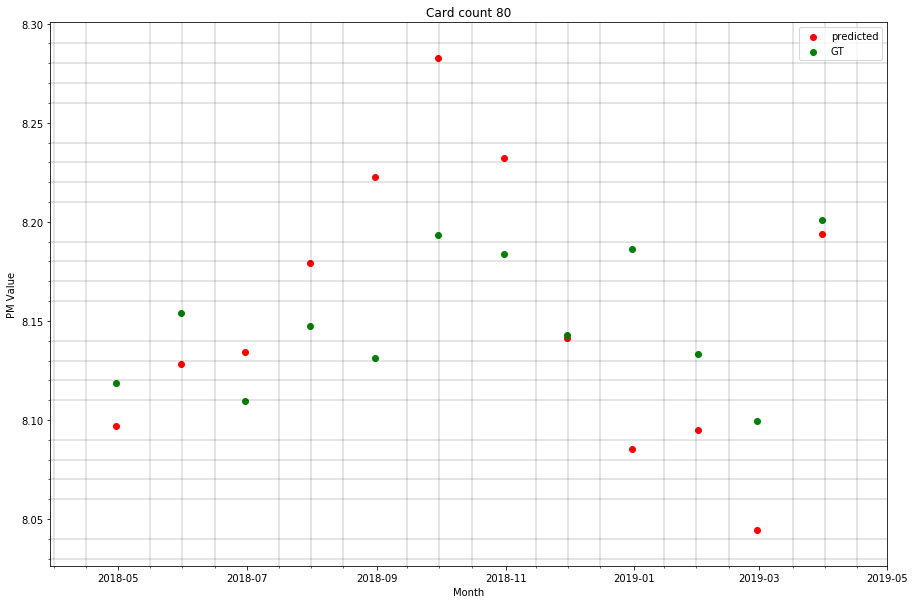

In [60]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(Data_test_pic2[20].index, Data_test_pic2[20]['predict'], c='r', label='predicted')
ax1.scatter(Data_test_pic2[20].index, Data_test_pic2[20]['USE_AMT_'+str(list_card_name[20])], c='g', label='GT')
plt.minorticks_on()
plt.title('Card count 80')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
plt.legend(loc='upper right')
plt.ylabel('PM Value')
plt.xlabel('Month')
#plt.show()
plt.savefig('지역,요일별유동인구/카드매출_LinearRegression_월 통합(80번).png', dpi=96*2, bbox_inches='tight', pad_inches=0.0)

#### ElasticNet Regression 모델 사용


In [66]:
from sklearn.linear_model import ElasticNet

ela_reg_predictions2=[]
ela_reg2=[]
for i in list_all_data:  # 변수 초기화
    ela_reg_predictions2.append(0)
    ela_reg2.append(0)
    
for i in range(len(list_all_data)):
    ela_reg2[i] = ElasticNet(alpha=0.05, l1_ratio=0.2)
    ela_reg2[i].fit(Data_train2[i], Data_train_labels2[i])
    ela_reg_predictions2[i] = ela_reg2[i].predict(Data_test2[i])

In [67]:
#prediction with ElasticNet Regression model
mse=[]
r2=[]
rmse=[]
for i in list_all_data:  # 변수 초기화
    mse.append(0)
    r2.append(0)
    rmse.append(0)
i=0
for j in list_card_name:
    mse[i], r2[i], rmse[i] = evaluation(Data_test_labels2[i], ela_reg_predictions2[i])
    print('\n-------------------------------'+str(j)+'번--------------------------------------\n')
    print('Test Set Check','MSE: ', mse[i],'\nR2 score: ', r2[i], '\nRMSE: ',rmse[i] )
    i+=1


-------------------------------10번--------------------------------------

Test Set Check MSE:  0.6771723870670484 
R2 score:  0.5606258707620561 
RMSE:  0.8229048469094397

-------------------------------20번--------------------------------------

Test Set Check MSE:  1.3088177134840506 
R2 score:  0.43926006378180127 
RMSE:  1.144035713377887

-------------------------------21번--------------------------------------

Test Set Check MSE:  1.206858652093687 
R2 score:  0.4104992056507909 
RMSE:  1.0985711866300185

-------------------------------22번--------------------------------------

Test Set Check MSE:  0.6666100749545354 
R2 score:  0.5518656644171995 
RMSE:  0.8164619249876478

-------------------------------30번--------------------------------------

Test Set Check MSE:  2.8277625339157697 
R2 score:  0.35950146829118734 
RMSE:  1.6815952348635417

-------------------------------31번--------------------------------------

Test Set Check MSE:  1.5385076430803202 
R2 score:  0.052973

#### Random Forest regressor 모델 사용


In [68]:
from sklearn.ensemble import RandomForestRegressor

random_forest_predictions2=[]
random_forest_reg2=[]
for i in list_all_data:  # 변수 초기화
    random_forest_predictions2.append(0)
    random_forest_reg2.append(0)
    
for i in range(len(list_all_data)):
    random_forest_reg2[i] = RandomForestRegressor(n_estimators=100, random_state=100, oob_score=True)
    random_forest_reg2[i].fit(Data_train2[i], Data_train_labels2[i])
    random_forest_predictions2[i] = random_forest_reg2[i].predict(Data_test2[i])

In [70]:
#prediction with Random Forest regressor model
mse=[]
r2=[]
rmse=[]
for i in list_all_data:  # 변수 초기화
    mse.append(0)
    r2.append(0)
    rmse.append(0)
i=0
for j in list_card_name:
    mse[i], r2[i], rmse[i] = evaluation(Data_test_labels2[i], random_forest_predictions2[i])
    print('\n-------------------------------'+str(j)+'번--------------------------------------\n')
    print('Test Set Check','MSE: ', mse[i],'\nR2 score: ', r2[i], '\nRMSE: ',rmse[i] )
    i+=1


-------------------------------10번--------------------------------------

Test Set Check MSE:  0.5898701651727298 
R2 score:  0.6172707346961728 
RMSE:  0.7680300548629134

-------------------------------20번--------------------------------------

Test Set Check MSE:  1.1035917629996406 
R2 score:  0.527185513750392 
RMSE:  1.0505197585003532

-------------------------------21번--------------------------------------

Test Set Check MSE:  1.0366239640526005 
R2 score:  0.4936518463116627 
RMSE:  1.0181473194251411

-------------------------------22번--------------------------------------

Test Set Check MSE:  0.6218392893839255 
R2 score:  0.5819632086923497 
RMSE:  0.7885678724015616

-------------------------------30번--------------------------------------

Test Set Check MSE:  1.192396401907873 
R2 score:  0.7299178642206265 
RMSE:  1.0919690480539606

-------------------------------31번--------------------------------------

Test Set Check MSE:  1.6214994978477224 
R2 score:  0.00188832

In [96]:
#list_card_name=[10, 20, 21, 22, 30, 31, 32, 33, 34, 35, 40, 42, 43, 44, 50, 52, 60, 62, 70, 71, 80, 81, 92]
# 결과값 그래프 도출
for i in range(len(list_card_name)):
    Data_test_pic2[i]['predict']=random_forest_predictions2[i]
    Data_test_pic2[i].reset_index(inplace=True)
    Data_test_pic2[i]=Data_test_pic2[i].sort_values(['STD_DD'])
    Data_test_pic2[i].set_index(['STD_DD'], inplace=True)

In [97]:
# 일별로 예측, 검증 값 표현하기
for i in range(len(list_card_name)):
    Data_test_pic2[i]=Data_test_pic2[i].resample('M', how={'USE_AMT_'+str(list_card_name[i]):np.sum, 'predict':np.sum}).dropna()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
Data_test_pic2[1]

,USE_AMT_20,predict
STD_DD,,
2018-04-30,5098.709344,5073.732838
2018-05-31,5328.566690,5328.915359
2018-06-30,4916.510727,4951.395123
2018-07-31,4578.157816,4610.338918
2018-08-31,4688.483297,4677.929648
2018-09-30,4410.553145,4382.858392
2018-10-31,5377.147170,5388.796589
2018-11-30,5347.911875,5324.743272
2018-12-31,4959.899468,4916.395409


C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


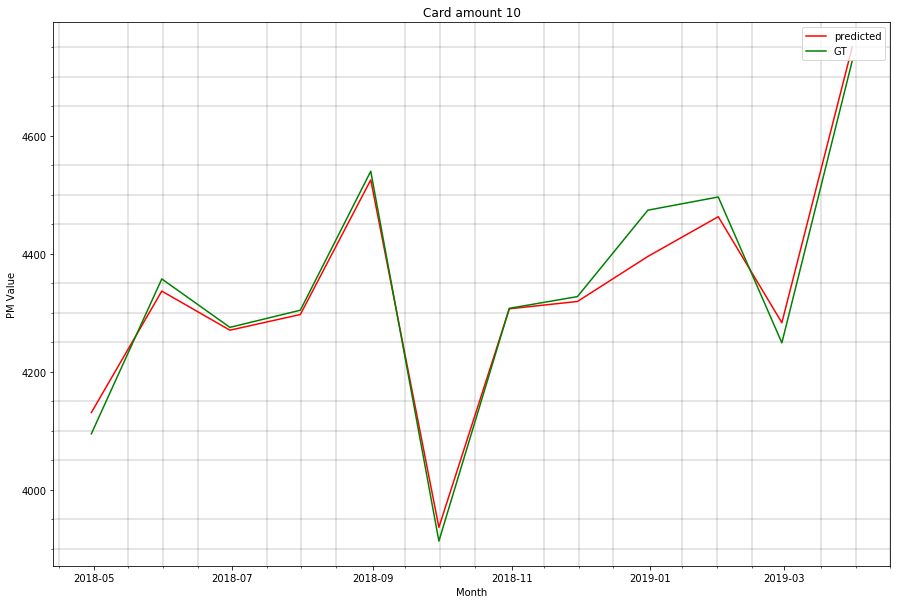

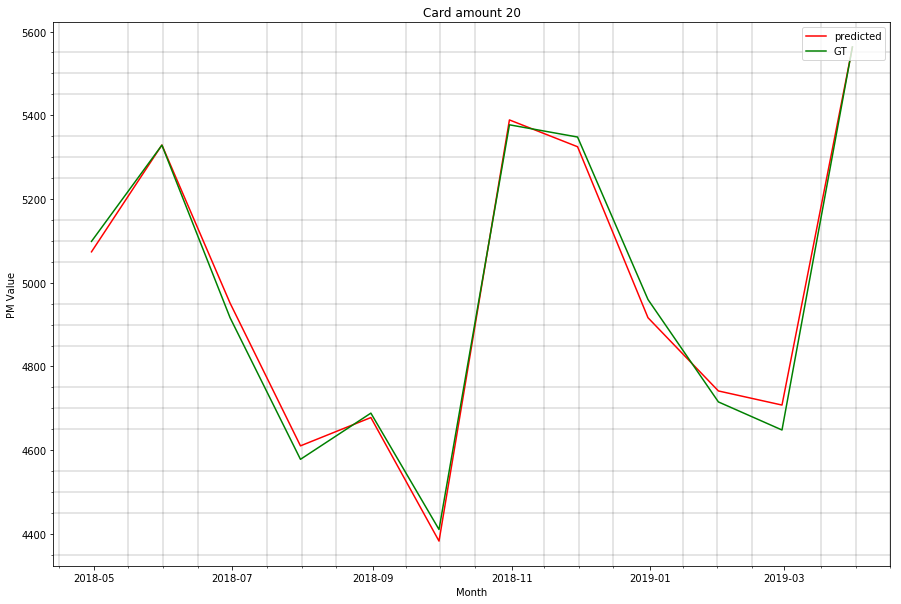

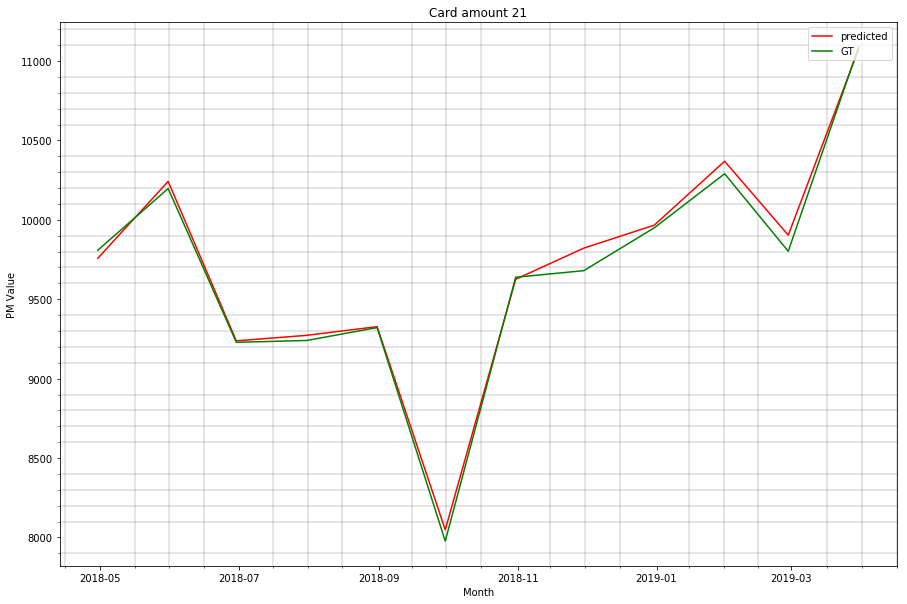

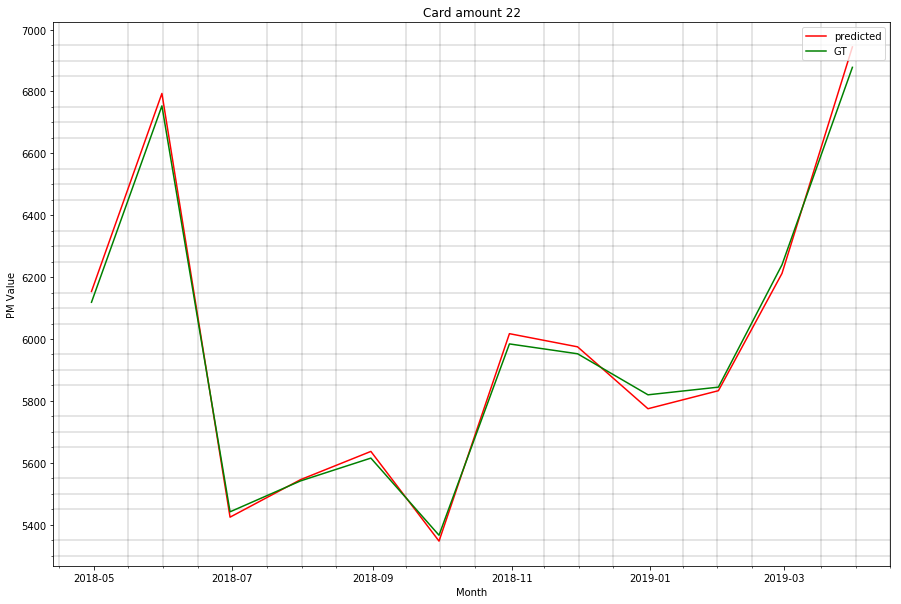

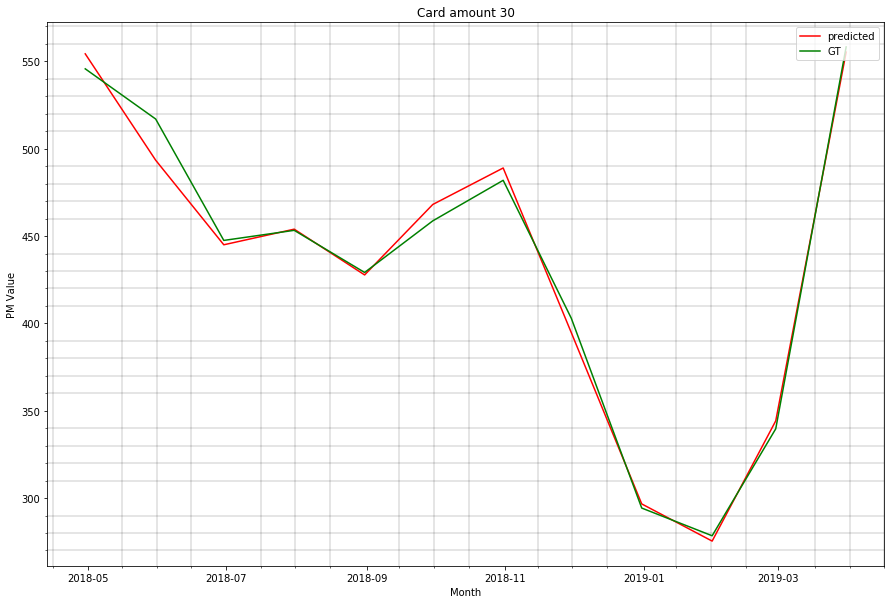

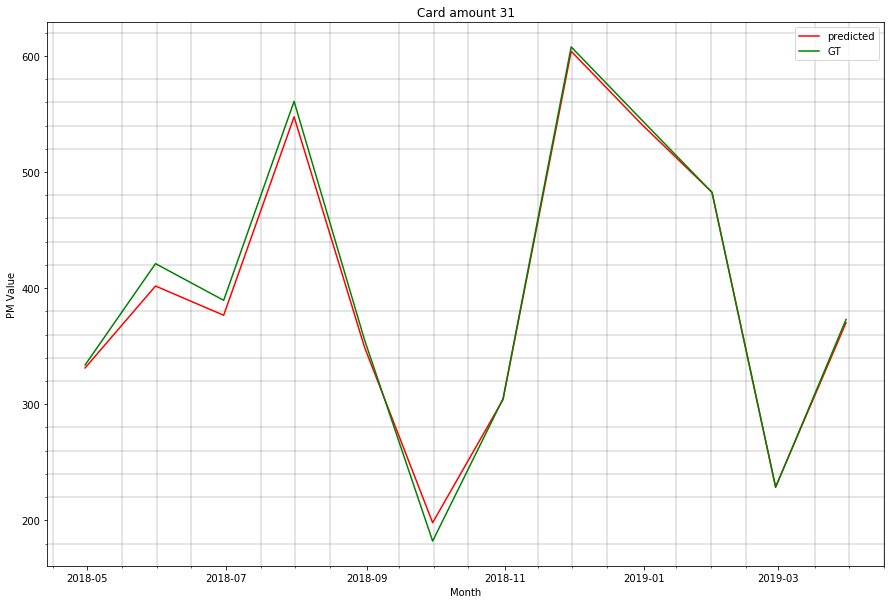

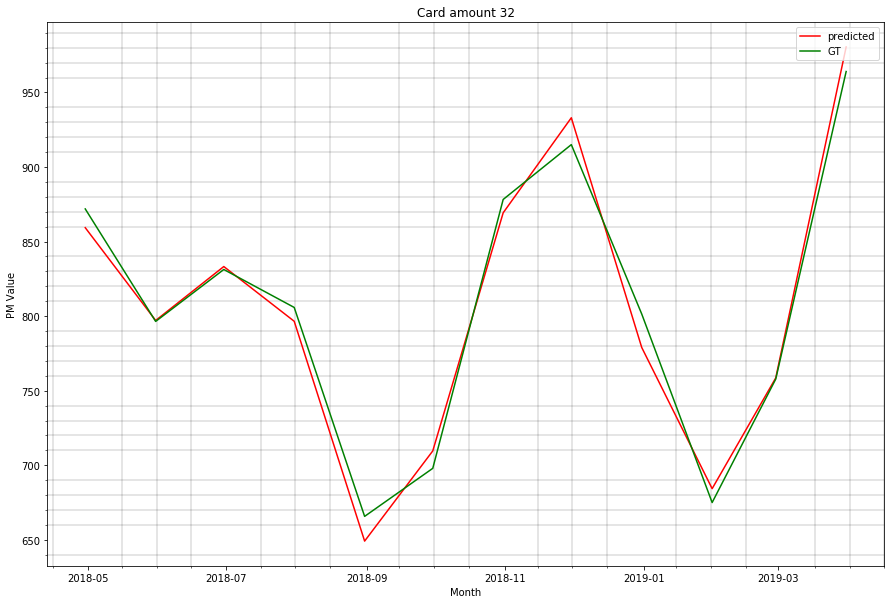

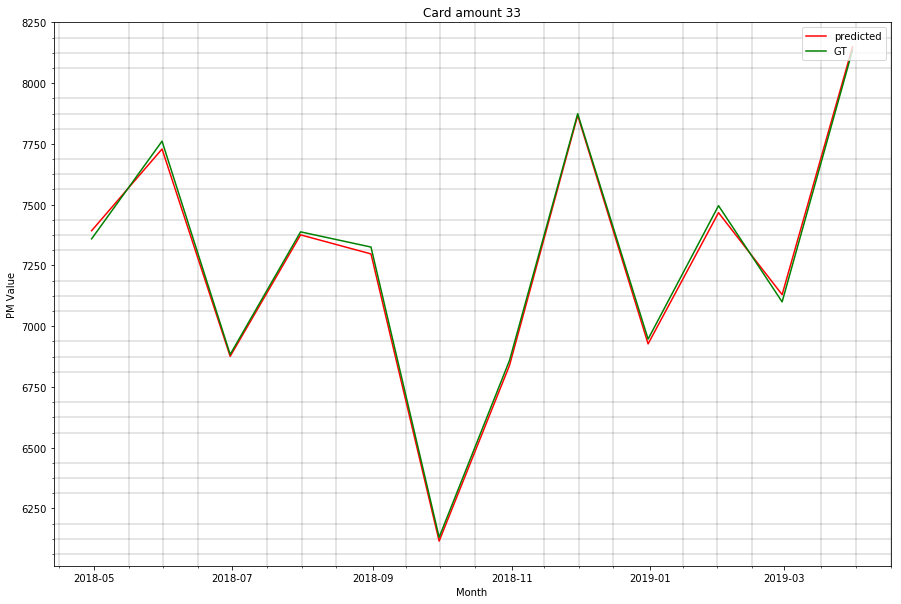

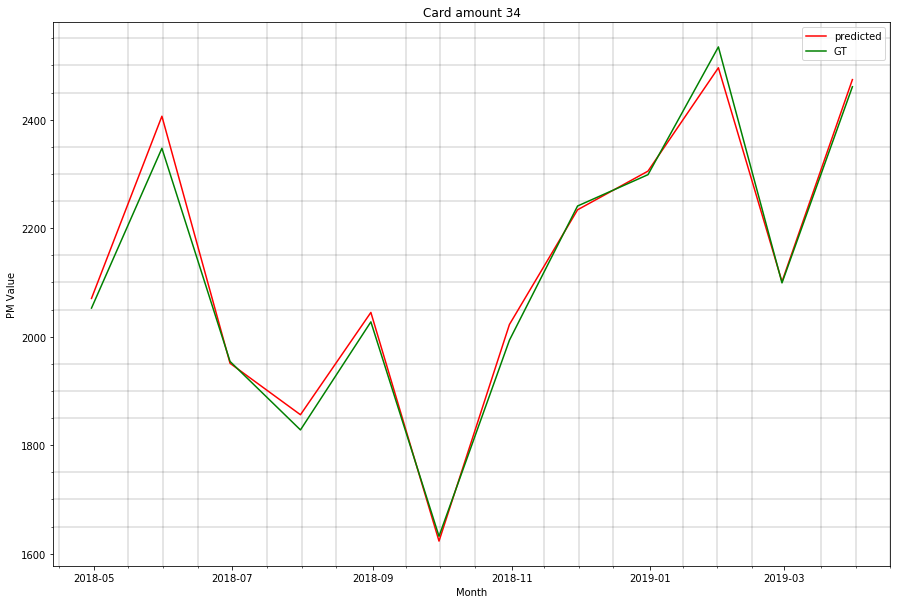

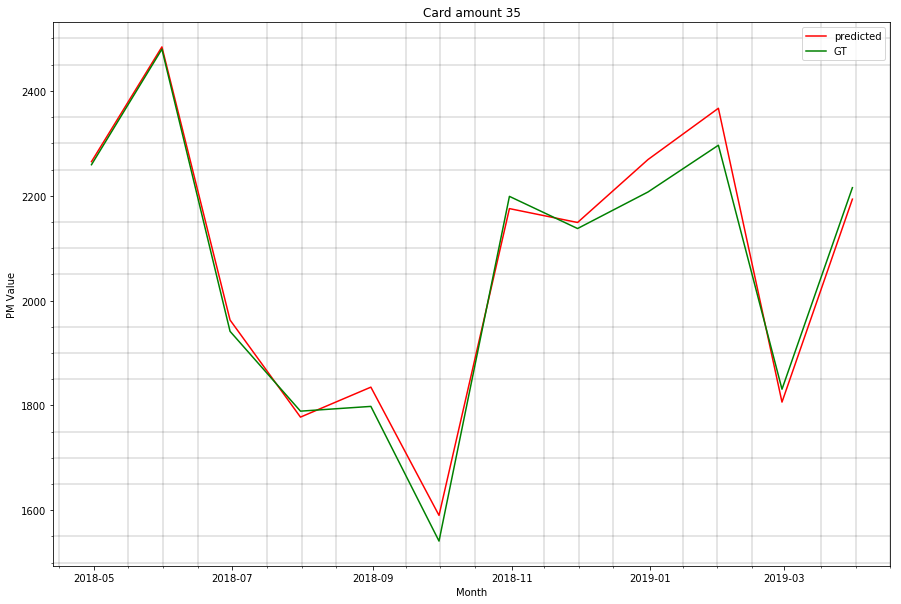

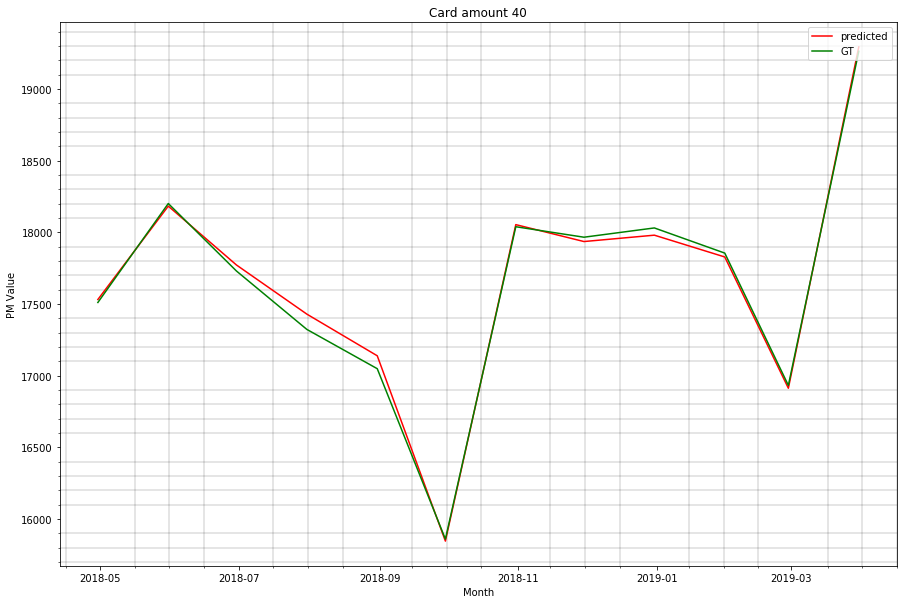

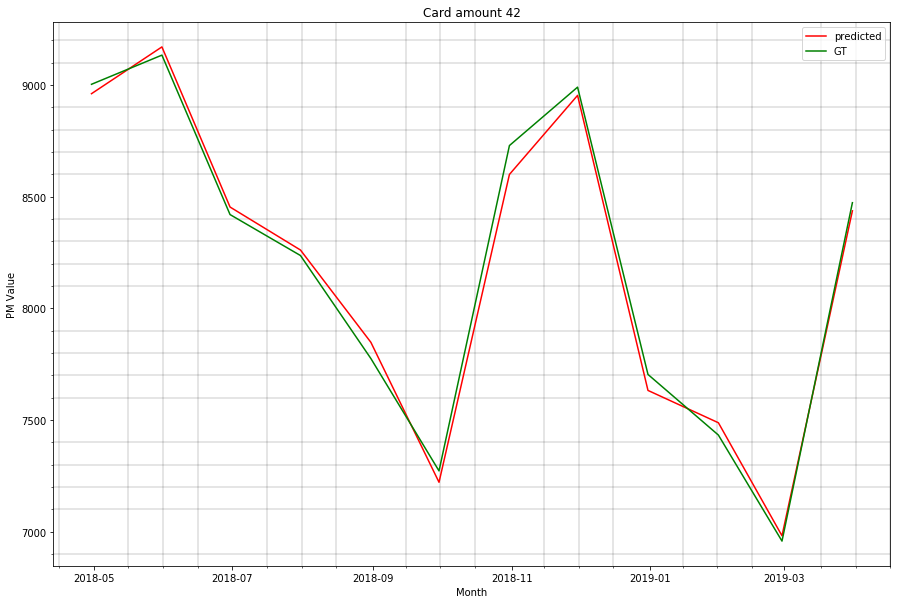

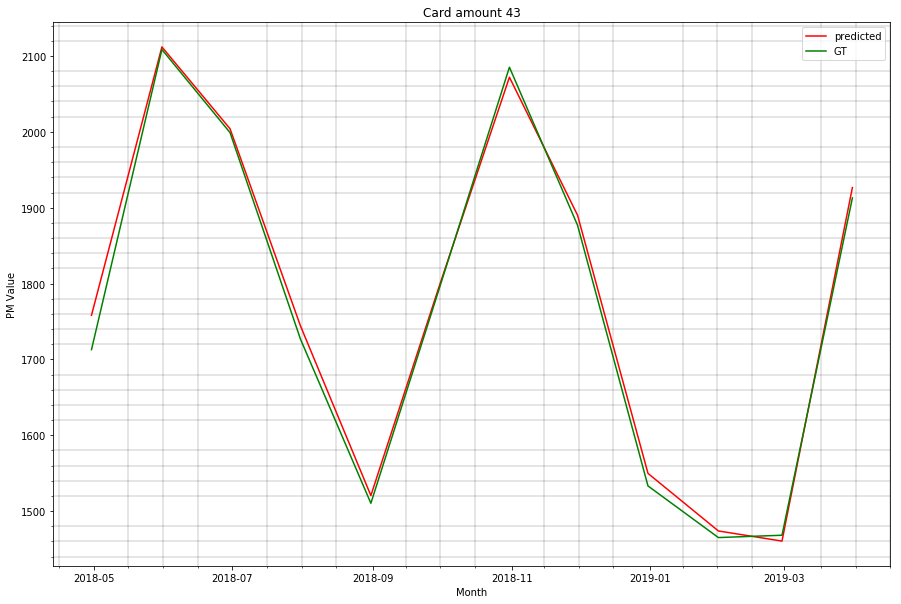

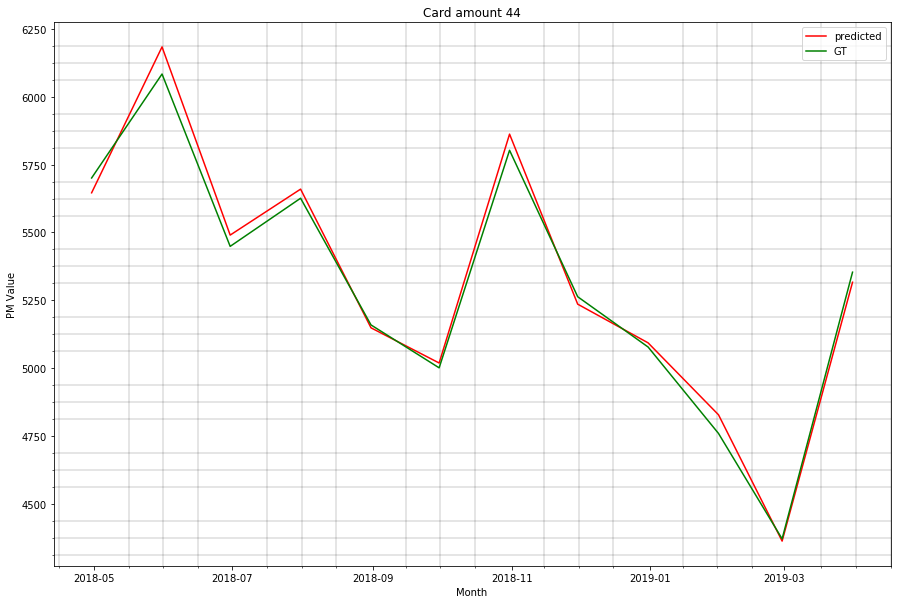

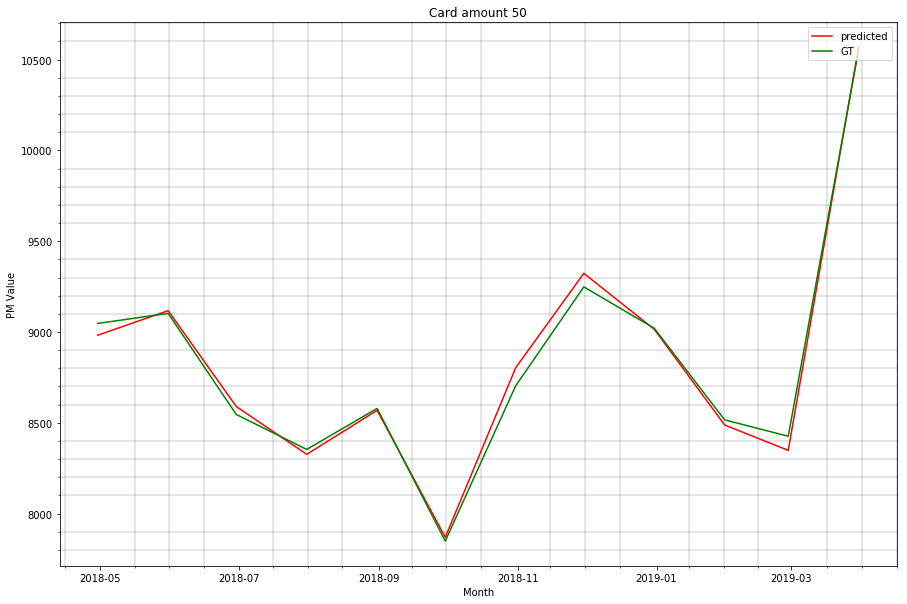

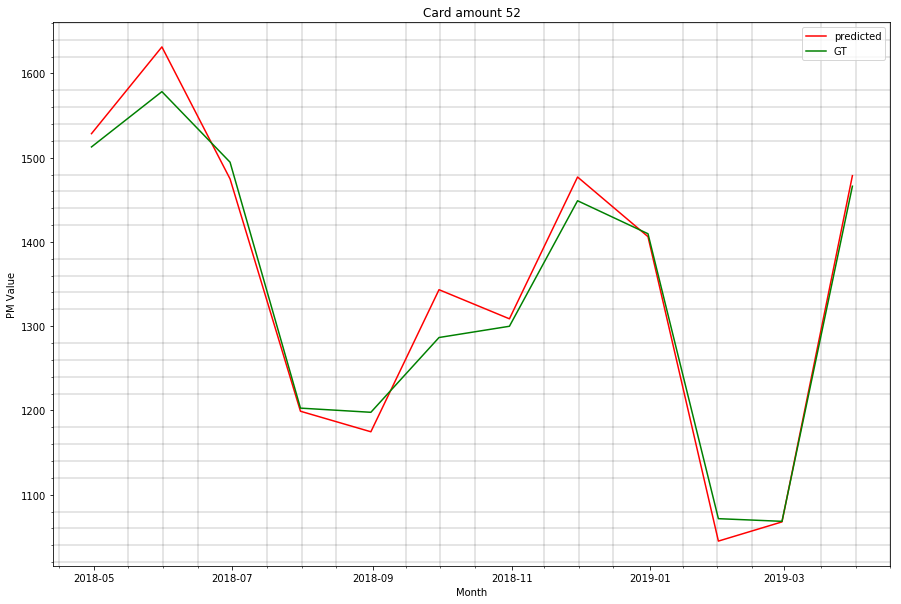

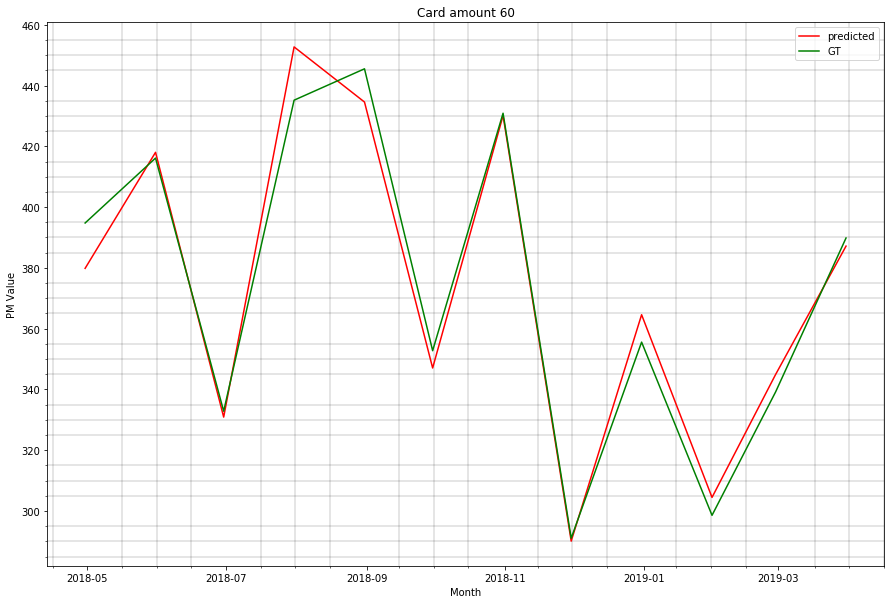

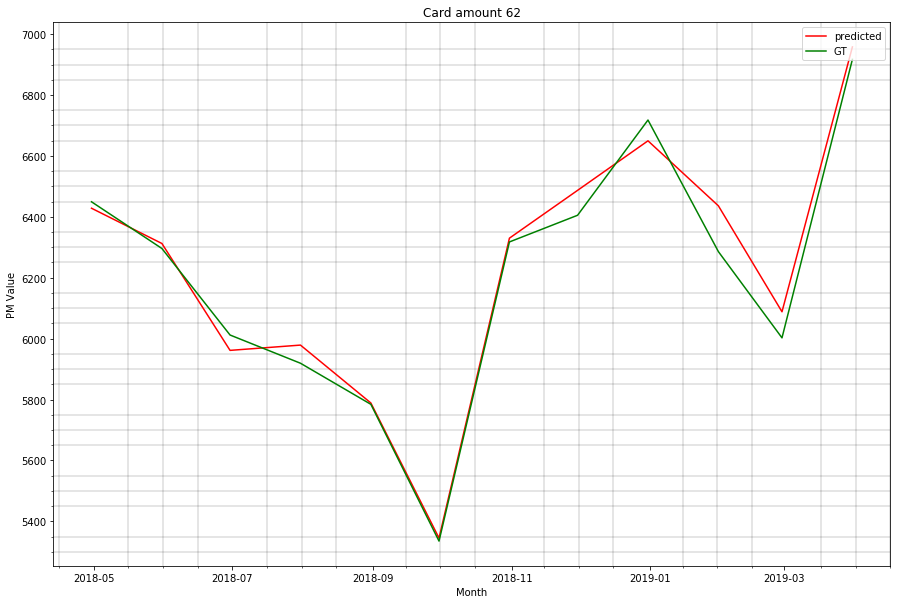

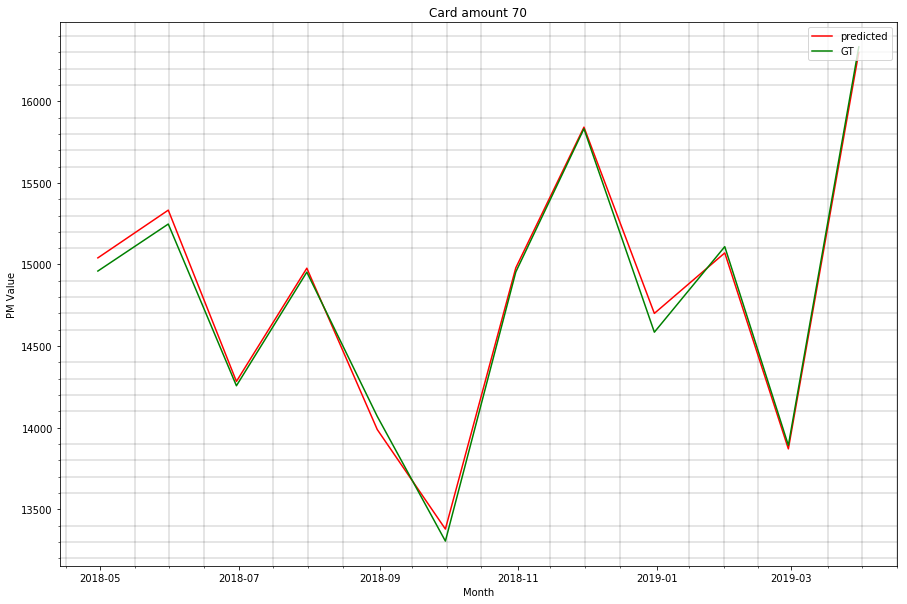

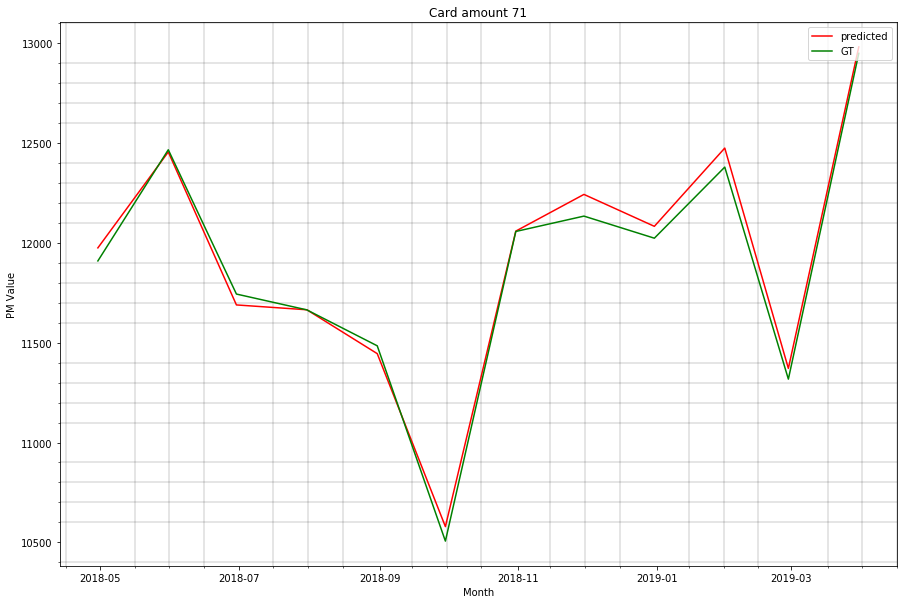

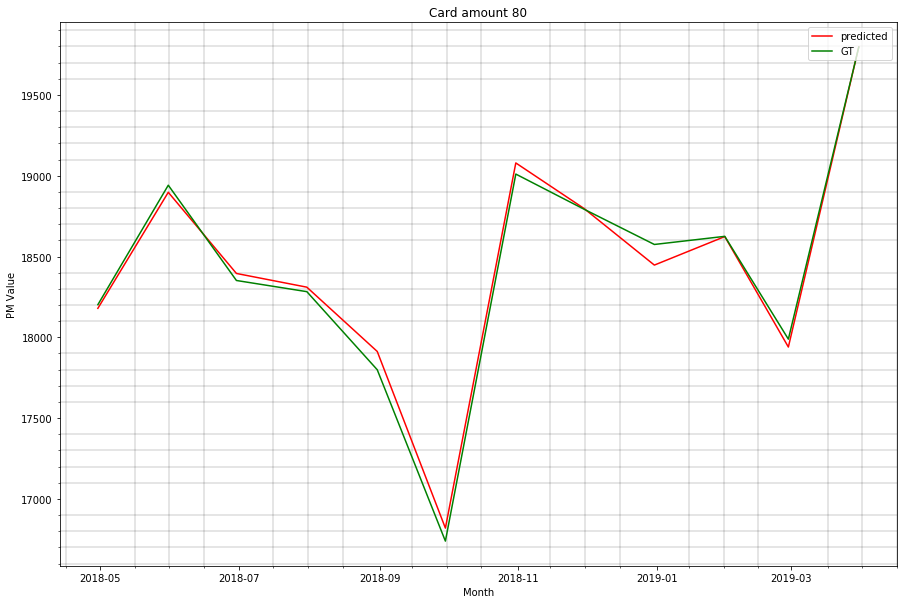

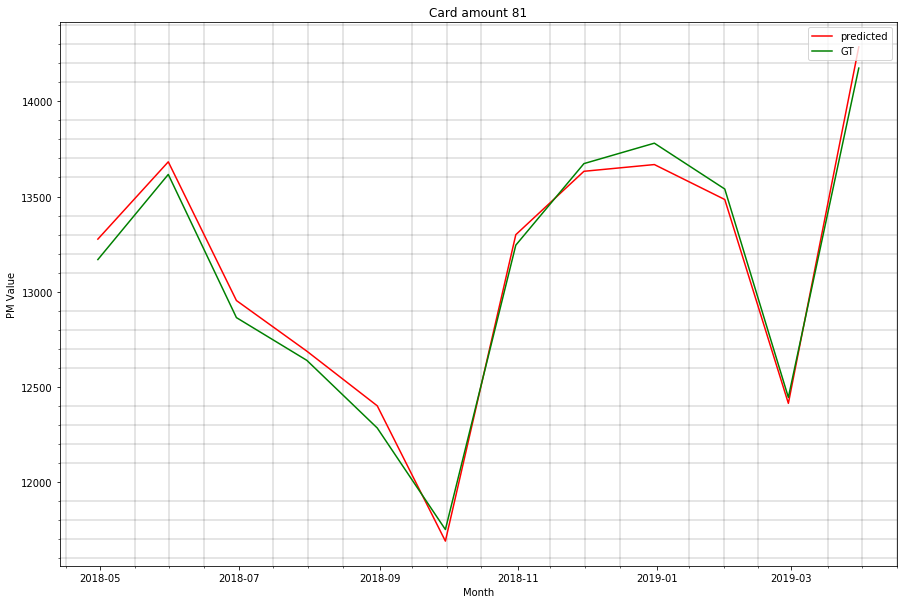

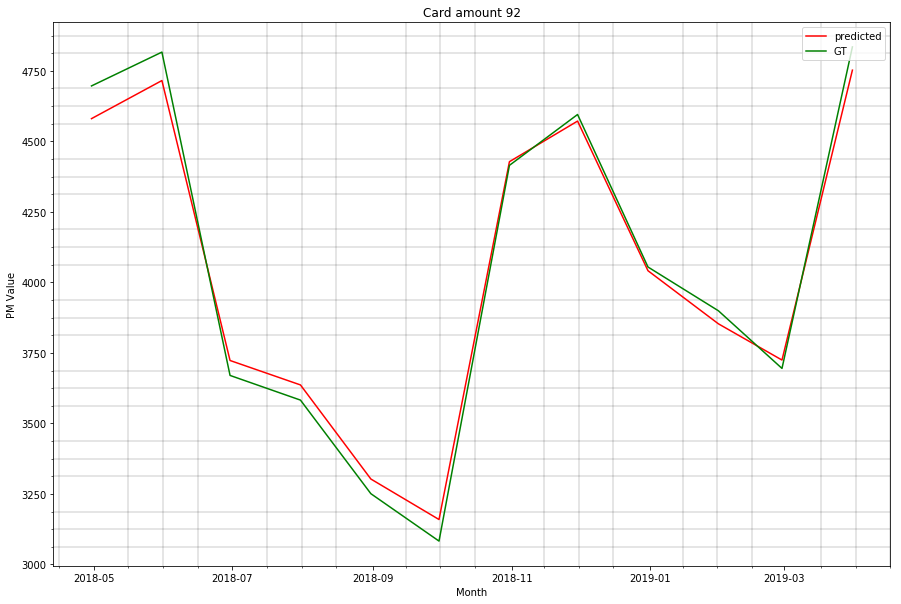

In [100]:
for i in range(len(list_card_name)):
    fig = plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(111)
    
    ax1.plot(Data_test_pic2[i].index, Data_test_pic2[i]['predict'], c='r', label='predicted')
    ax1.plot(Data_test_pic2[i].index, Data_test_pic2[i]['USE_AMT_'+str(list_card_name[i])], c='g', label='GT')
    plt.minorticks_on()
    plt.title('Card amount '+str(list_card_name[i]))
    plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
    plt.legend(loc='upper right')
    plt.ylabel('PM Value')
    plt.xlabel('Month')
    
    plt.savefig('지역,요일별유동인구/카드매출_Randomforest_월별 통합('+str(list_card_name[i])+'번).png', dpi=96*2, bbox_inches='tight', pad_inches=0.0)